In [1]:
%load_ext autoreload
%autoreload 2
from functools import partial
import os
import keras

from datasets import example_datasets, to_numpy
from models import mixture_poissons,poisson_glm
from metrics import mixture_poi_loss, get_bpr_loss_func, mix_bpr, get_penalized_bpr_loss_func_mix
from experiments import training_loop
from plotting_funcs import plot_losses, plot_frontier, plot_component_histograms, plot_winners

import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from glob import glob

import matplotlib.pyplot as plt

2024-05-06 12:19:58.191403: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 12:19:58.255455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 12:19:58.255499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 12:19:58.256830: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 12:19:58.268144: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model_base = '/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3'
penalized_models = glob(f'{model_base}/*/penalized_model')
bpr_models = glob(f'{model_base}/*/bpr_only_model')
nll_models = glob(f'{model_base}/*/nll_only_model')

In [3]:
seed=360
K=4
do_only=True
# tracts/distributions
S=12
# history/features
H = 3
# total timepoints
T= 500

train_dataset, val_dataset, test_dataset = example_datasets(H, T, seed=seed)

input_shape = (H,S)

val_X_THS, val_y_TS = to_numpy(val_dataset)

negative_bpr_K = get_bpr_loss_func(K)

In [20]:
component_preds, mixture_weights = y_preds

predict_constant, predict_variable, predict_lottery = np.zeros_like(component_preds), np.zeros_like(y_preds[0]) , np.zeros_like(y_preds[0])  
predict_constant[:,0:4,:] = 1
predict_variable[:,4:8,:] = 1
predict_lottery[:,8:,:] = 1 


bpr_constant = mix_bpr(val_y_TS, (predict_constant, mixture_weights),
                       negative_bpr_K_func=negative_bpr_K)
bpr_variable = mix_bpr(val_y_TS, (predict_variable, mixture_weights),
                          negative_bpr_K_func=negative_bpr_K)
bpr_lottery = mix_bpr(val_y_TS, (predict_lottery, mixture_weights),
                            negative_bpr_K_func=negative_bpr_K)

print(bpr_constant, bpr_variable, bpr_lottery)  

tf.Tensor(-0.5104456, shape=(), dtype=float32) tf.Tensor(-0.5080727, shape=(), dtype=float32) tf.Tensor(-0.39955354, shape=(), dtype=float32)


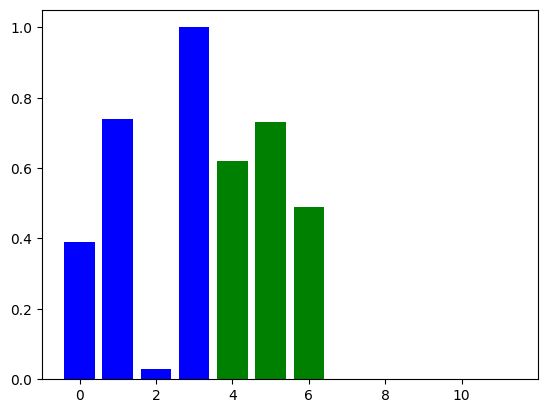

In [ ]:
plot_winners(y_preds, K)

In [79]:

bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5584166>

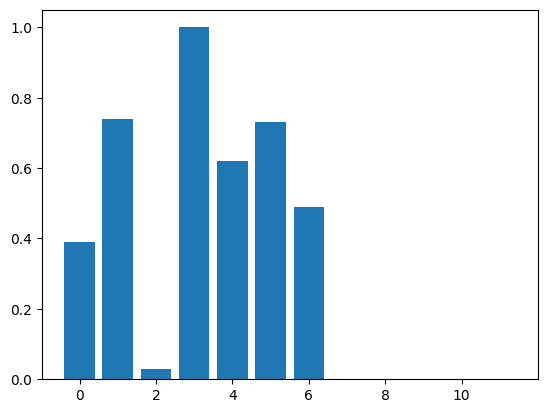

In [78]:
plot_winners(y_preds, K=K)

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


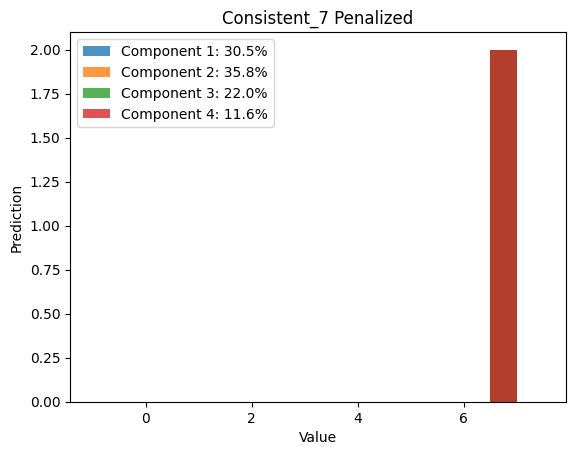

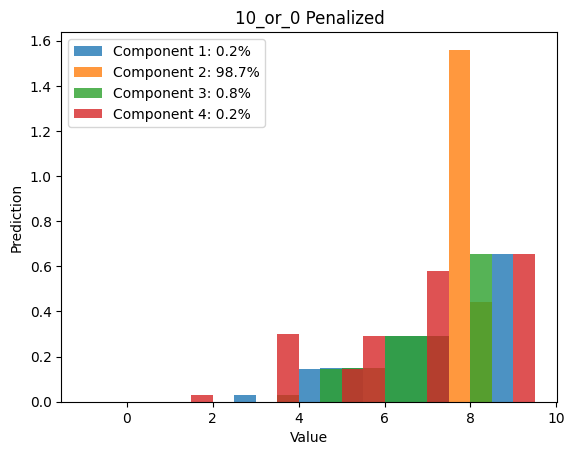

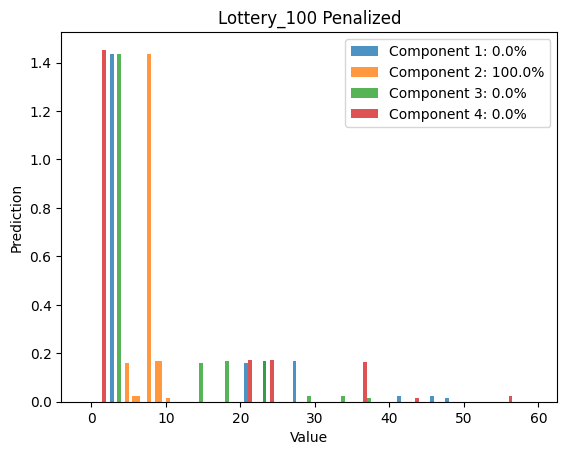

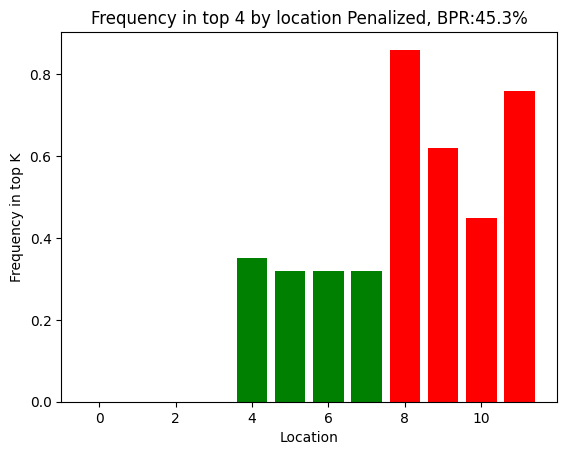

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


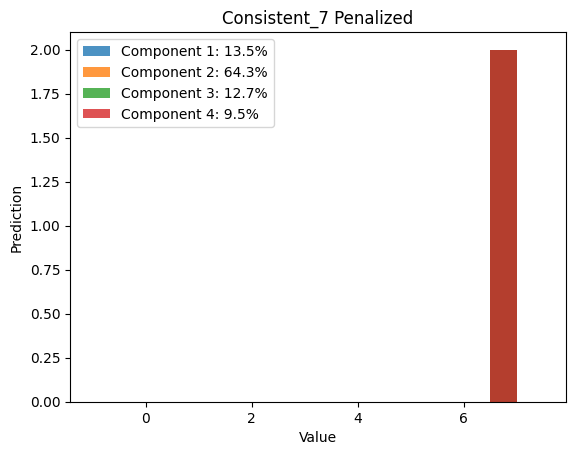

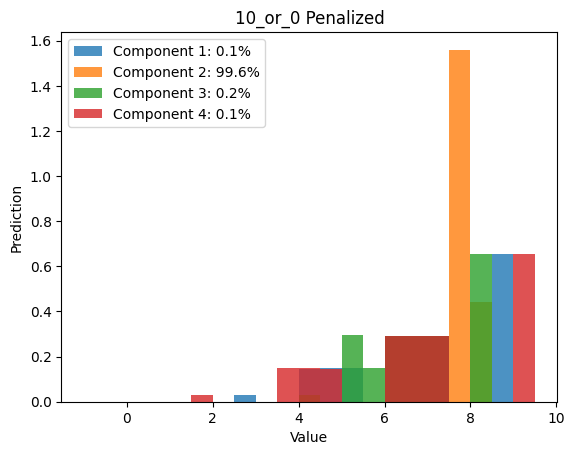

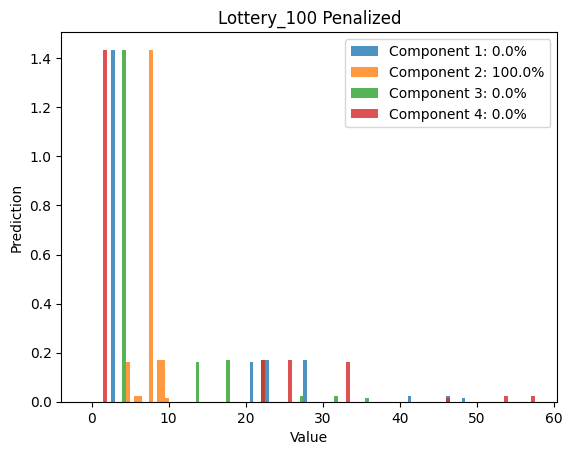

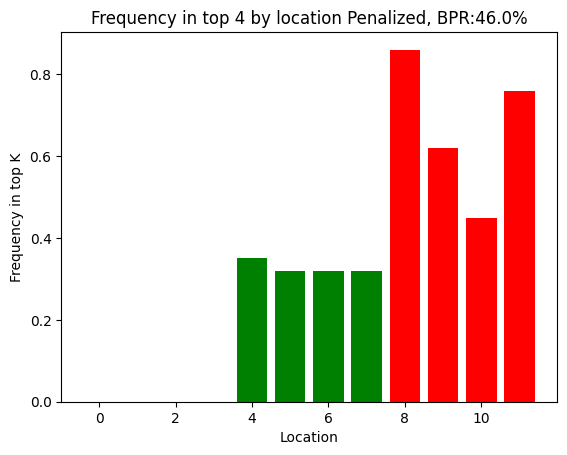

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


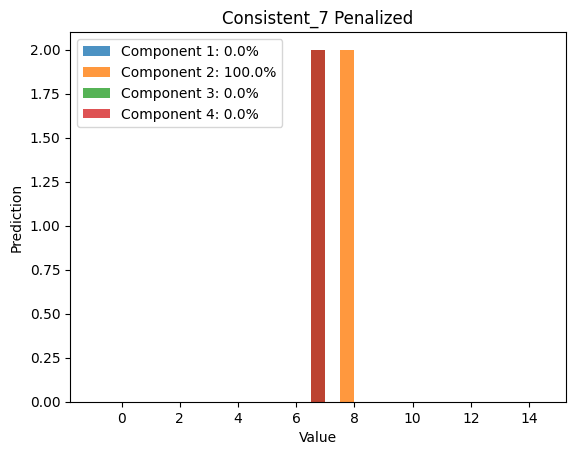

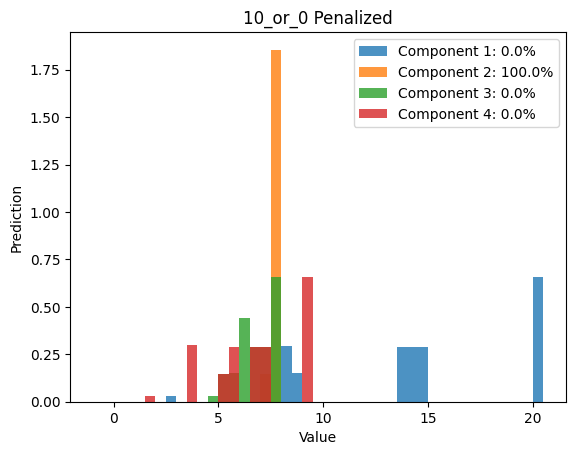

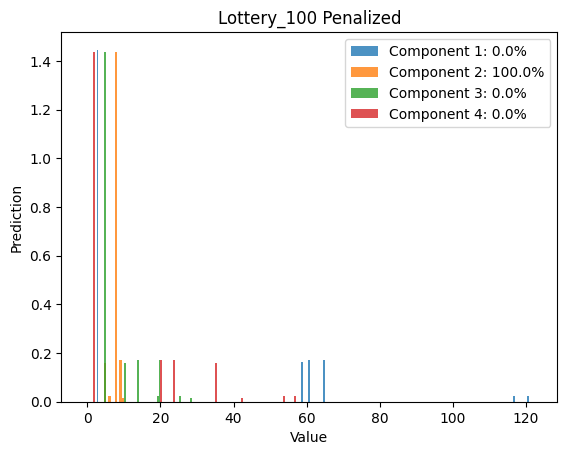

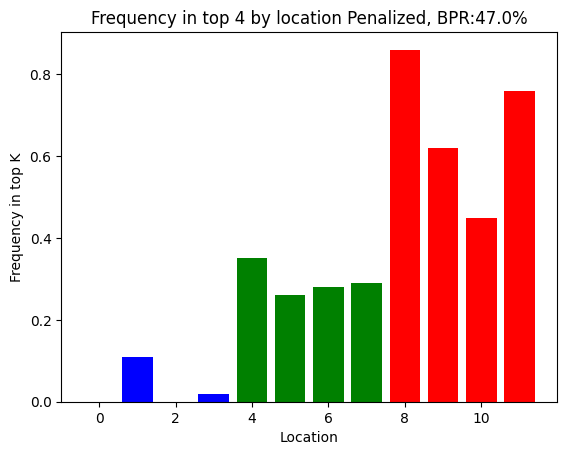

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


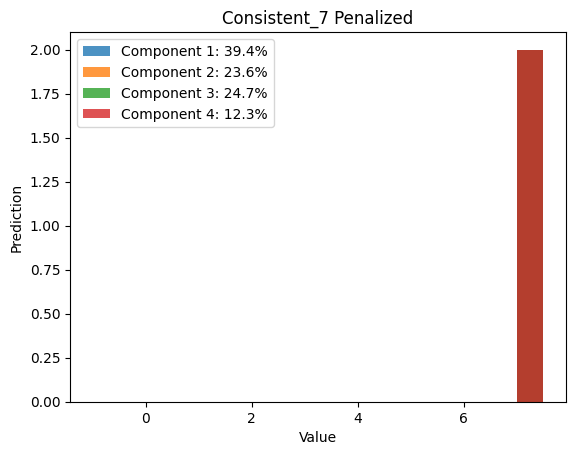

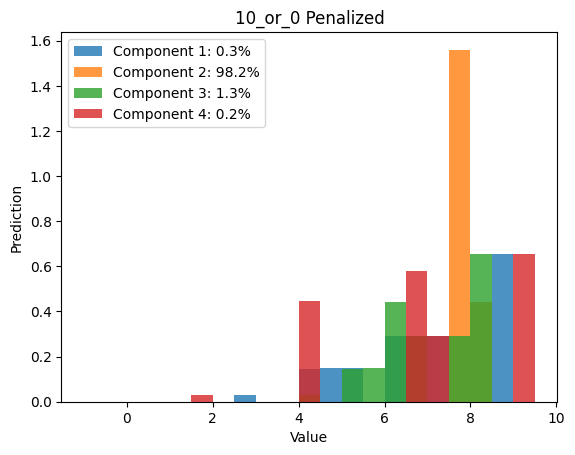

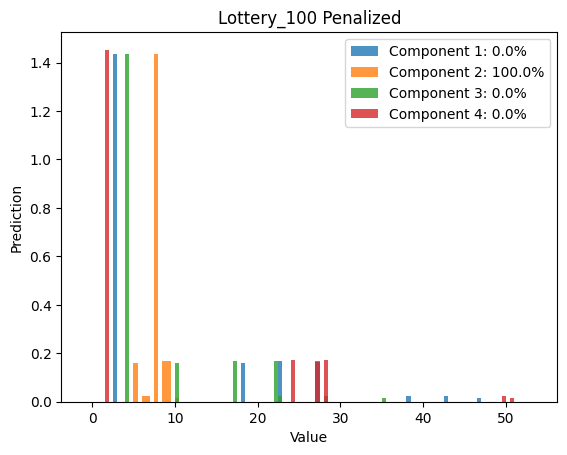

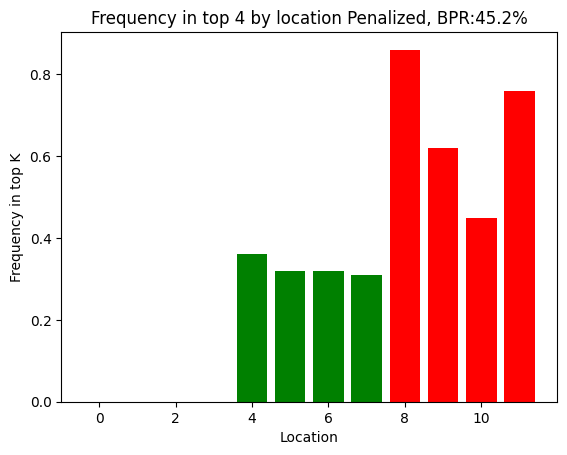

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


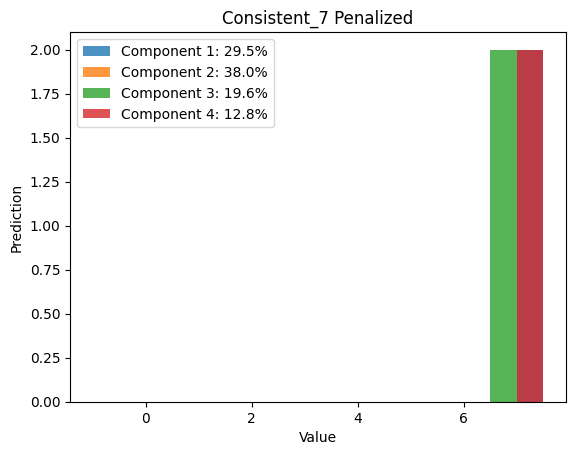

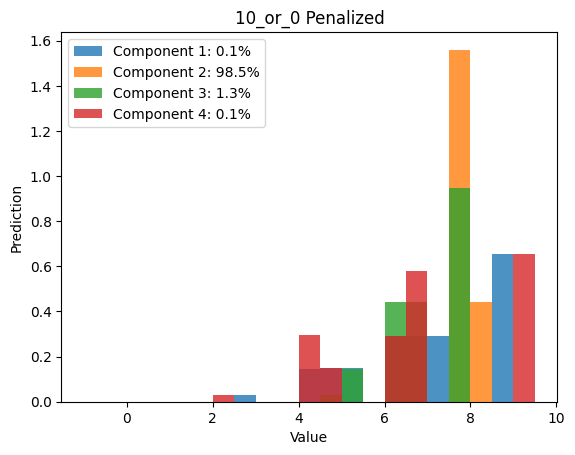

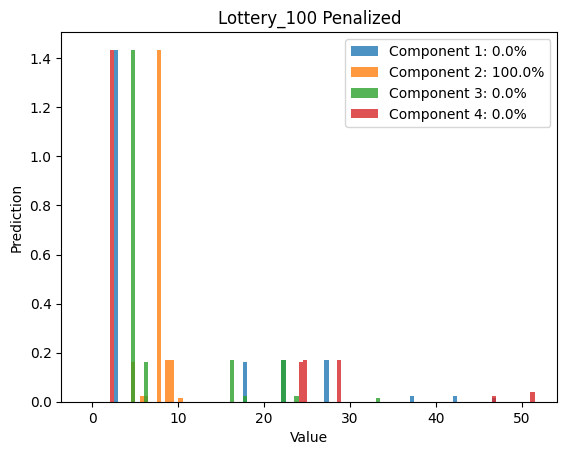

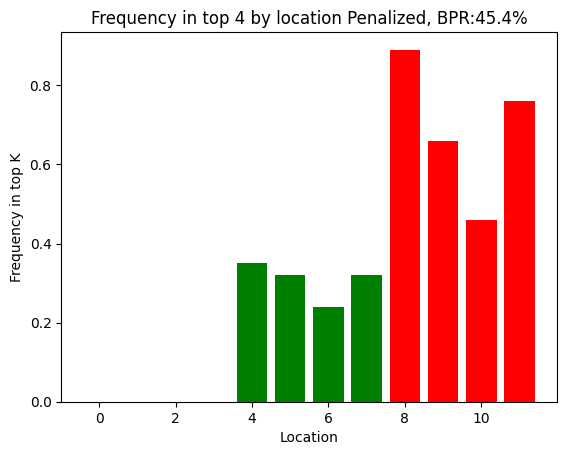

(4, 12)


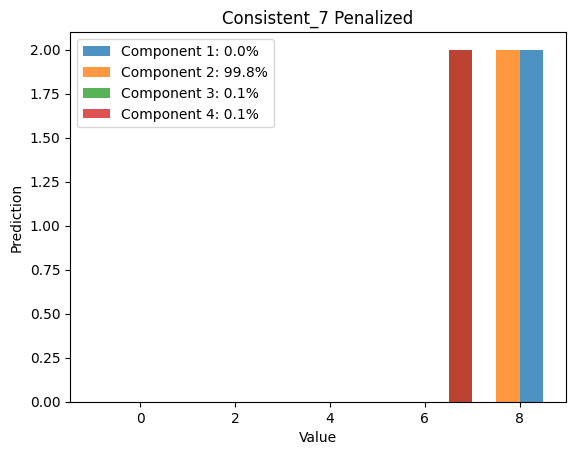

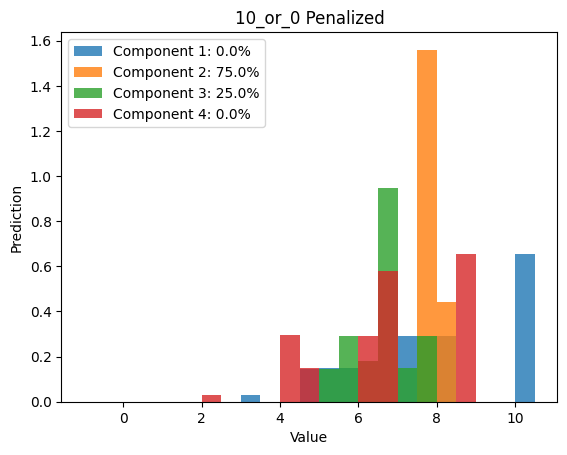

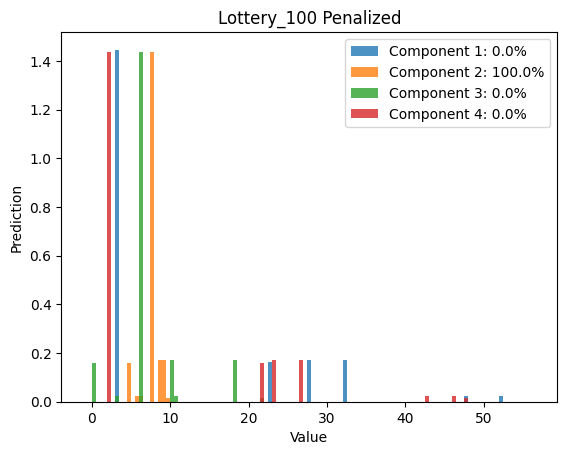

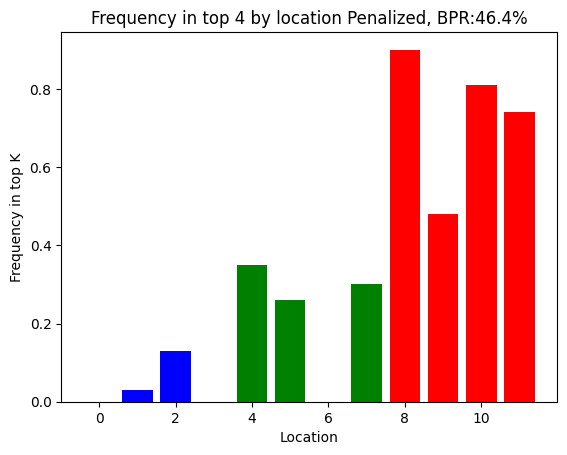

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


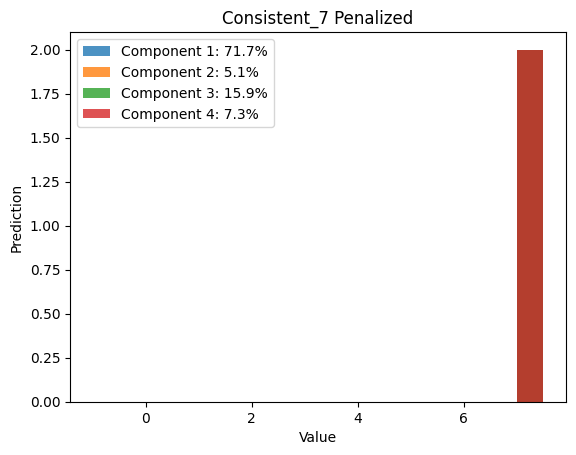

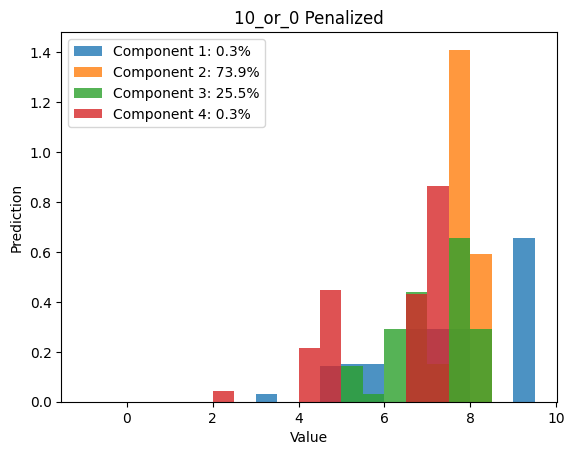

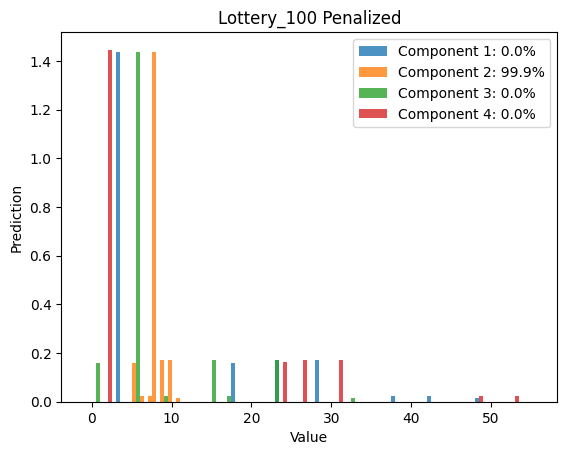

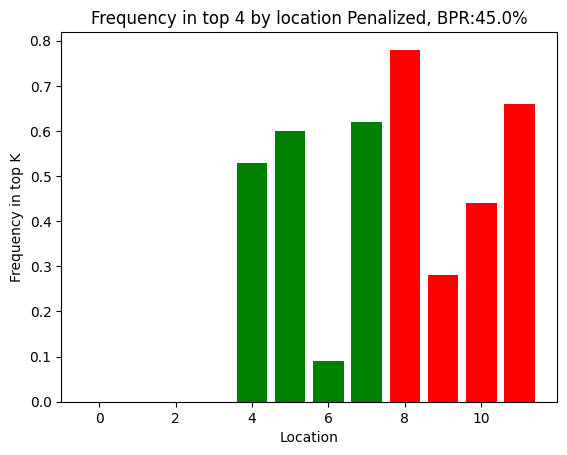

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


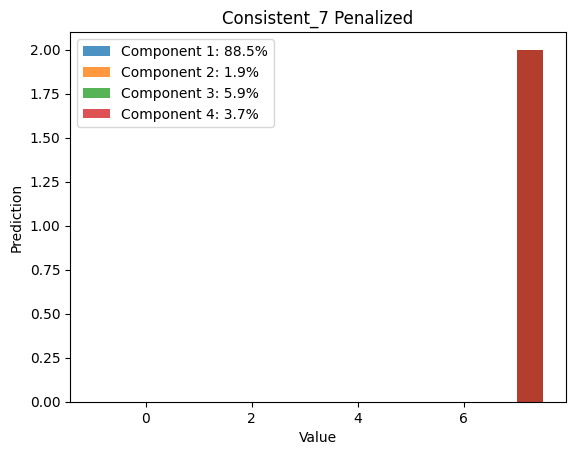

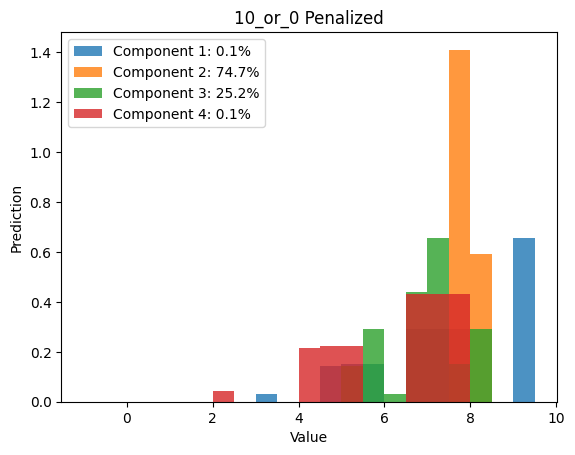

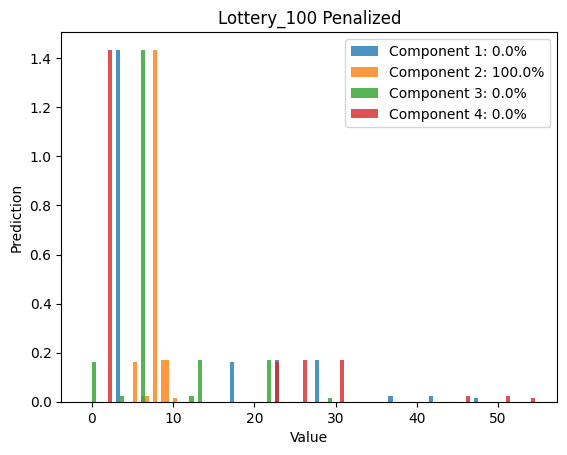

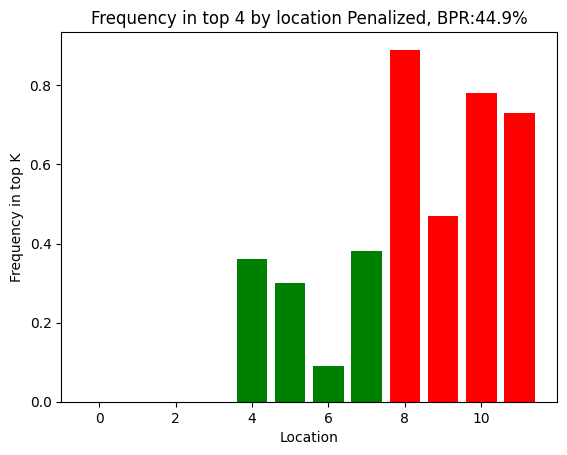

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


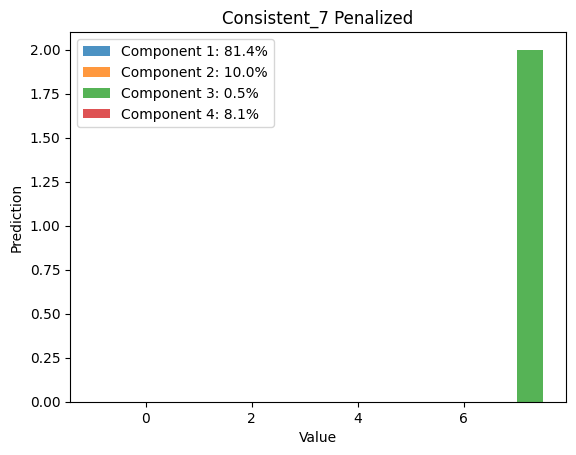

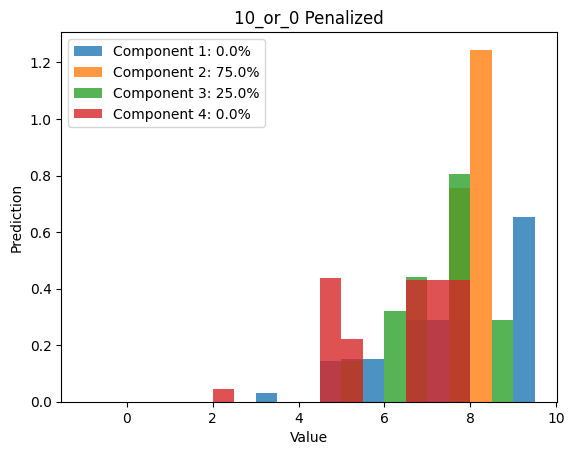

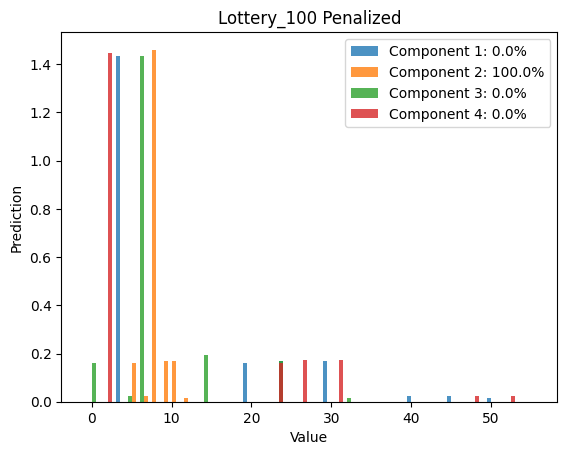

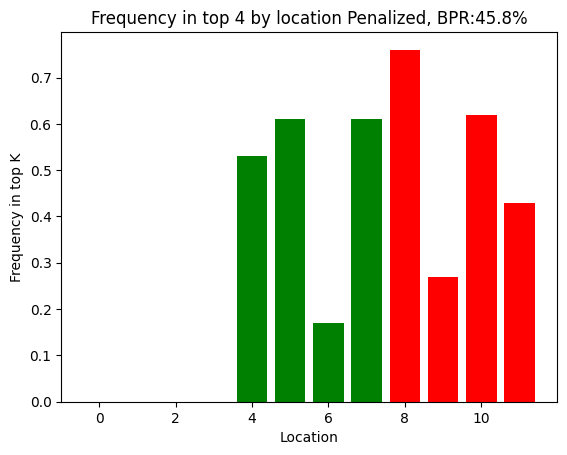

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


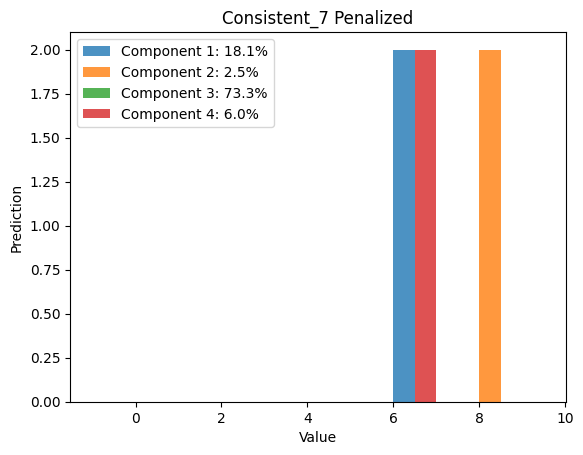

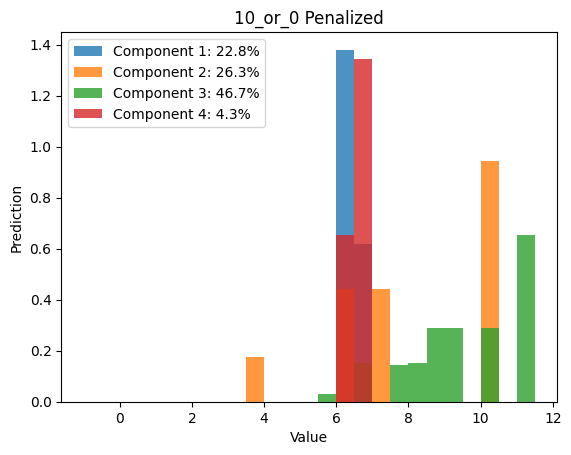

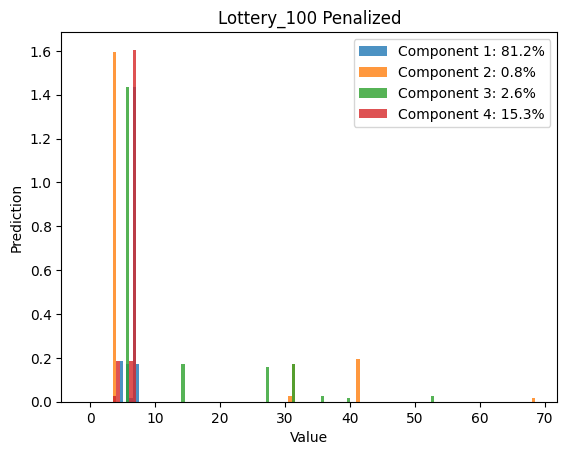

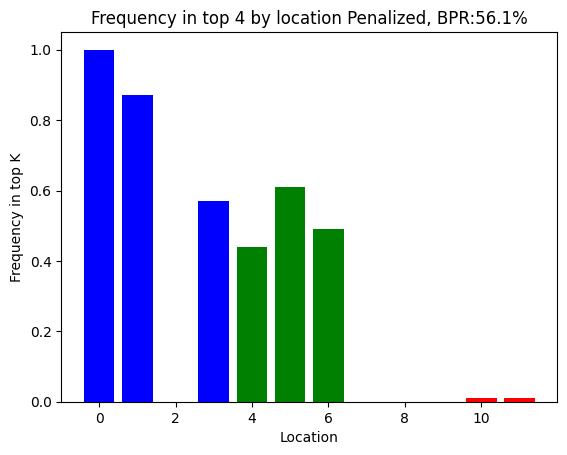

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


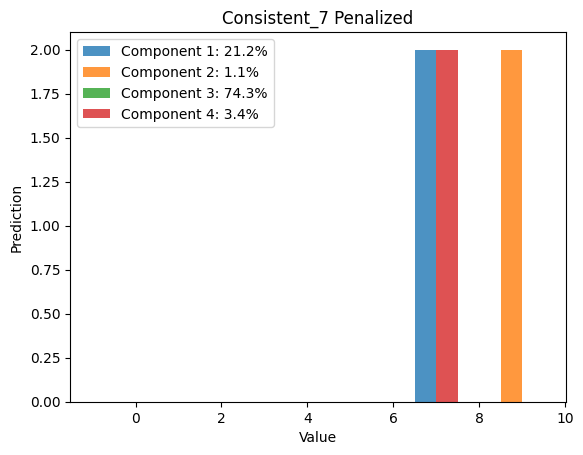

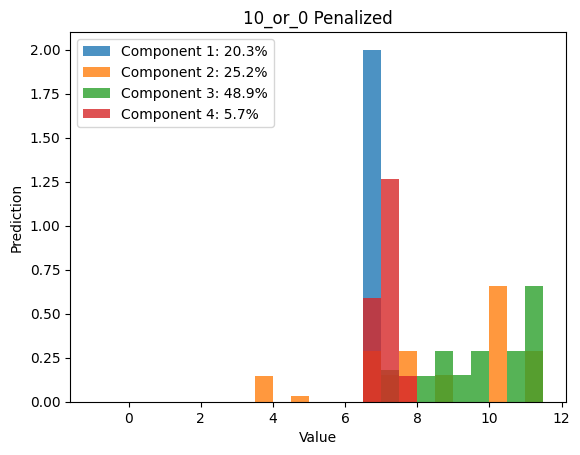

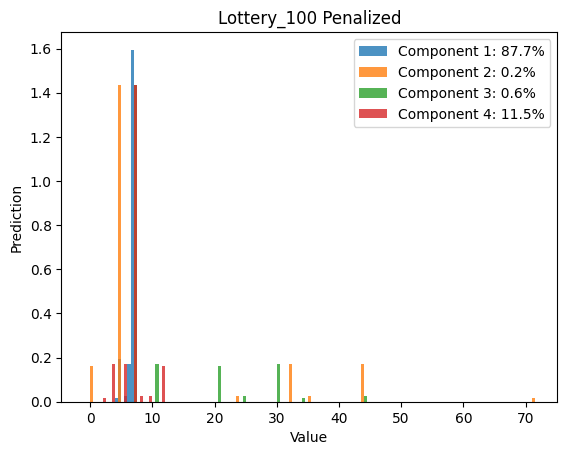

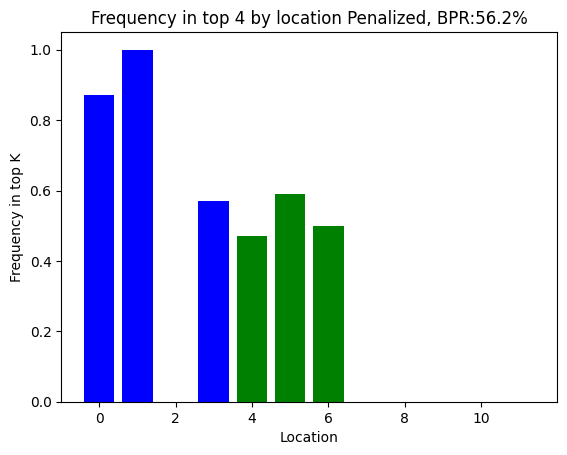

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


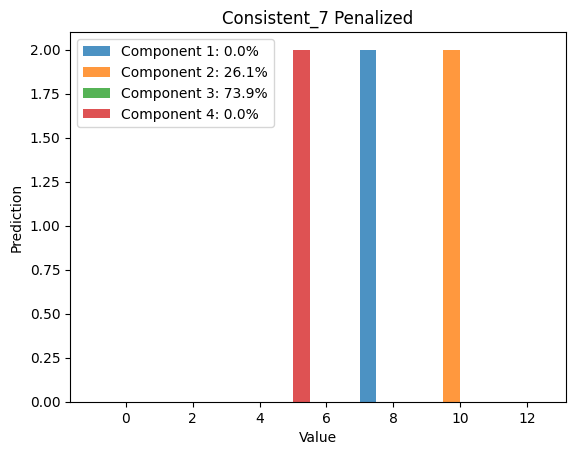

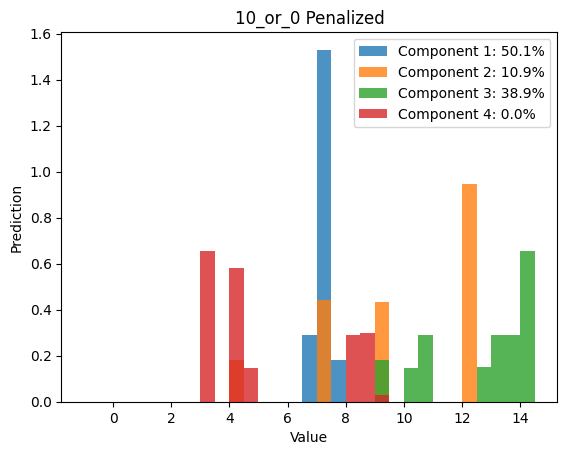

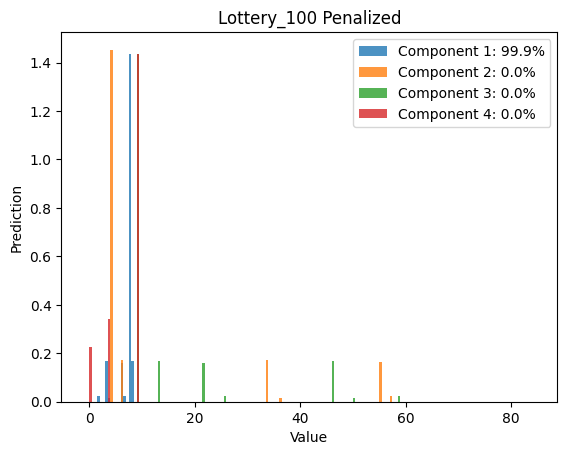

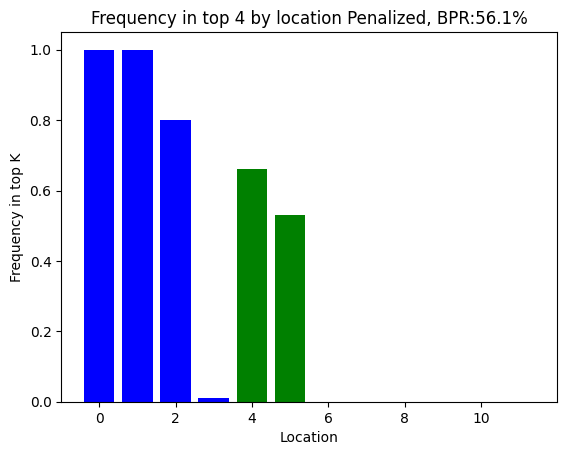

(4, 12)


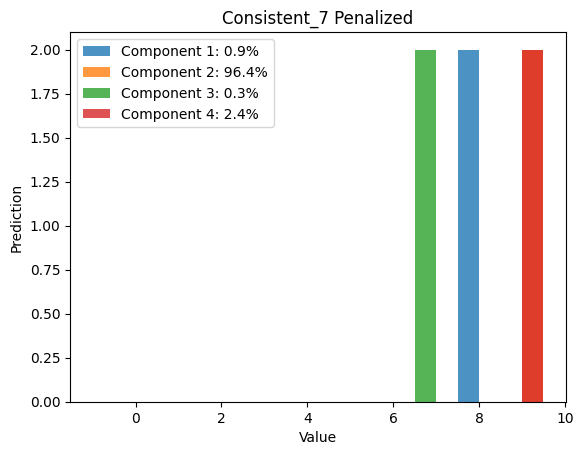

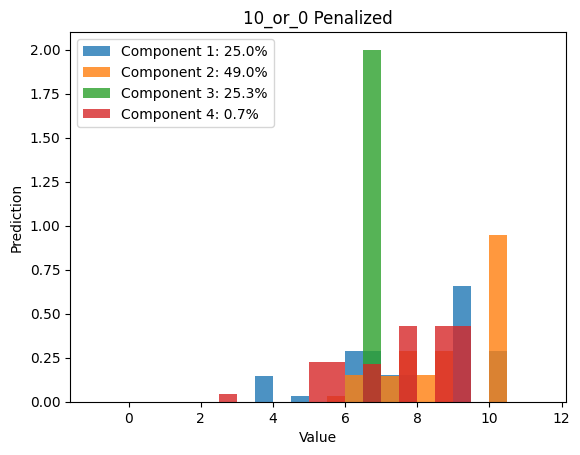

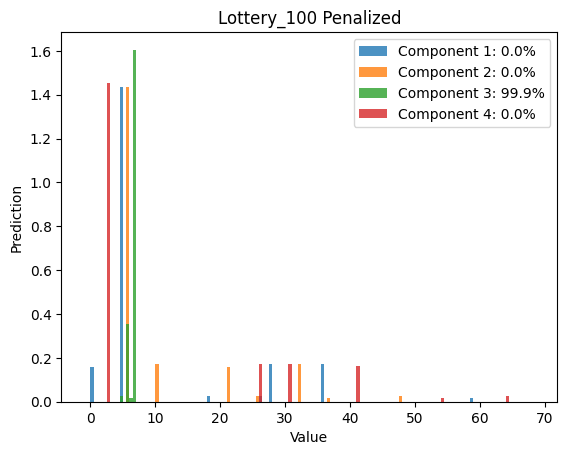

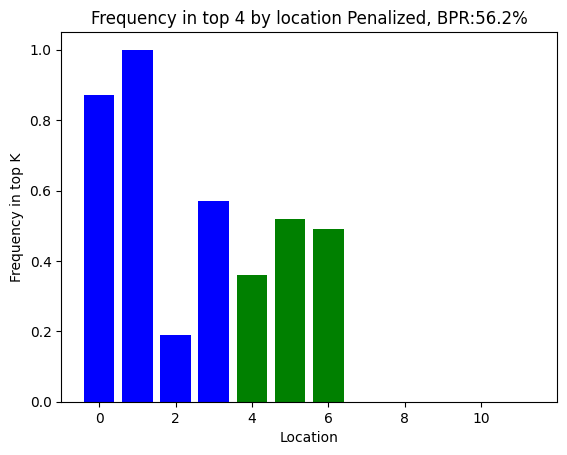

(4, 12)


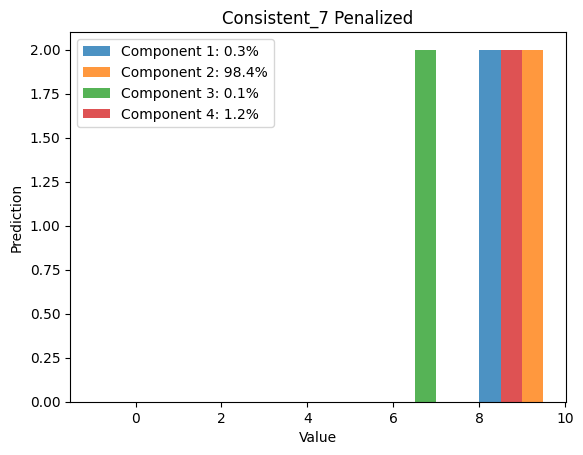

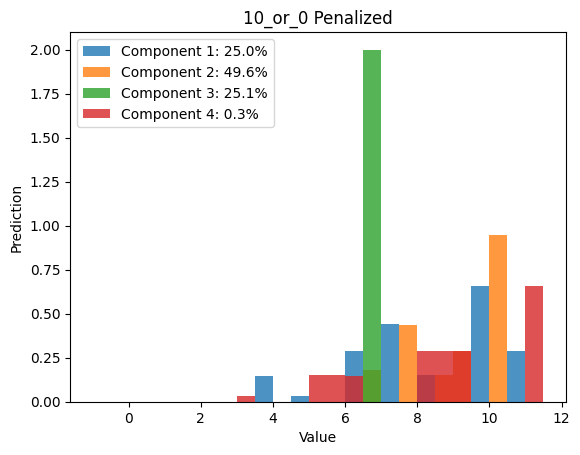

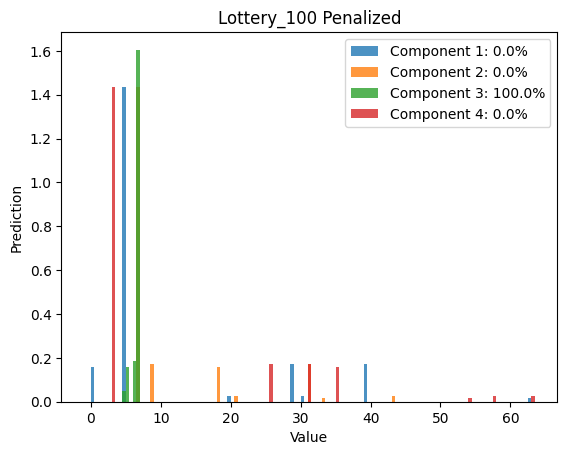

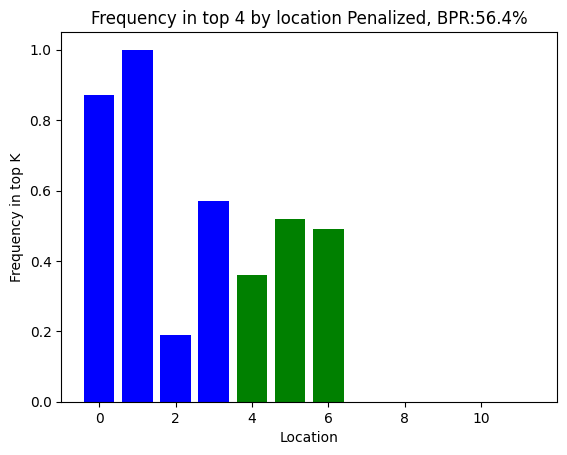

(4, 12)


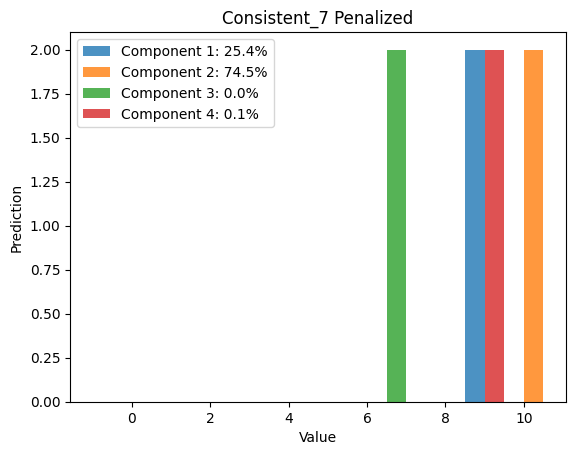

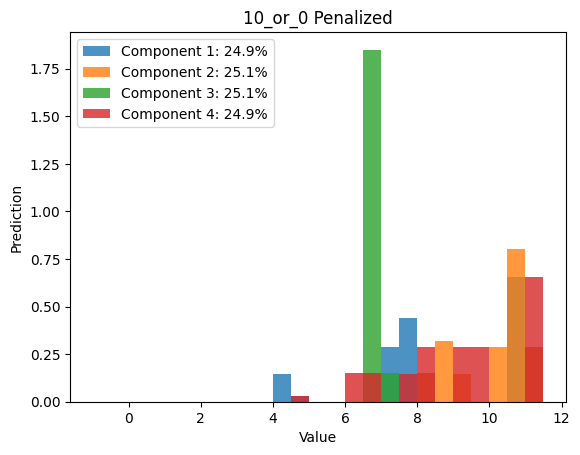

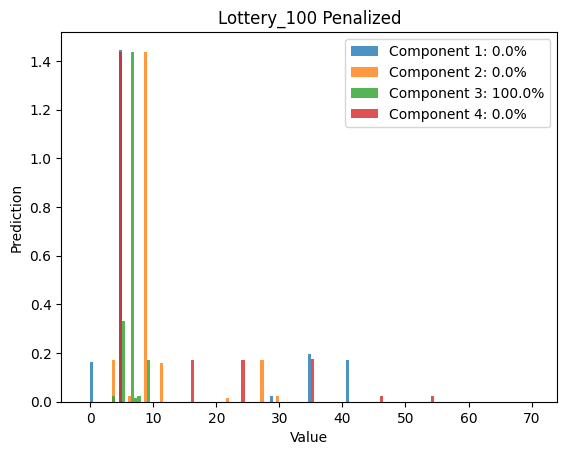

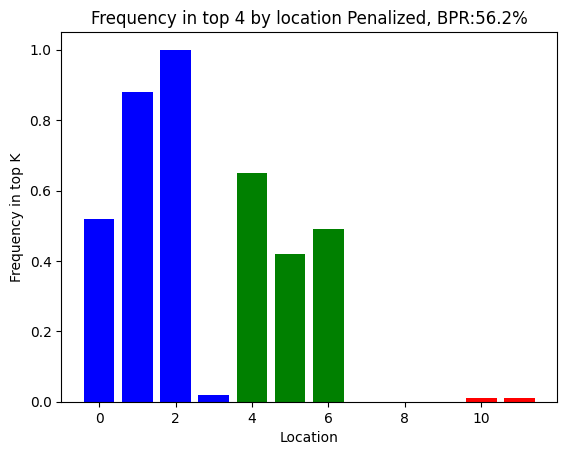

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


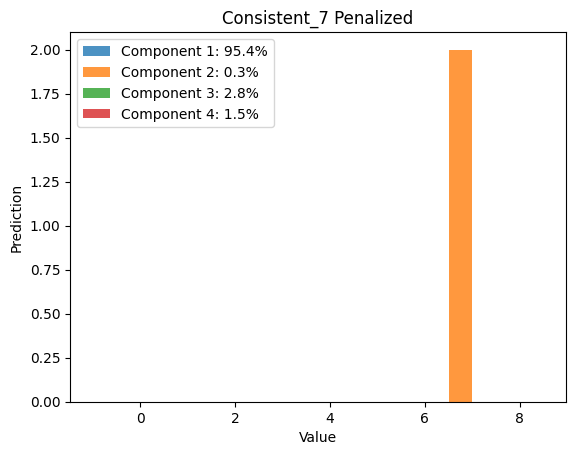

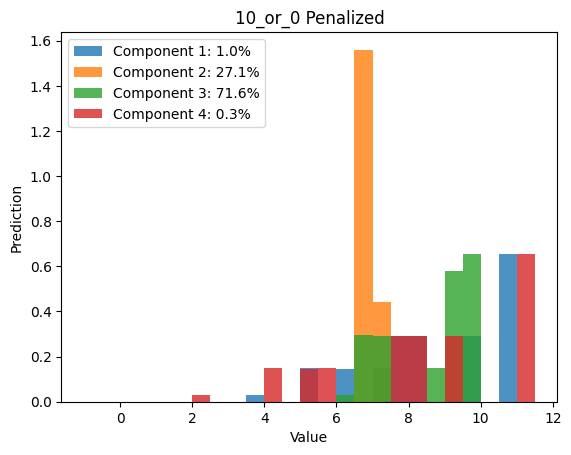

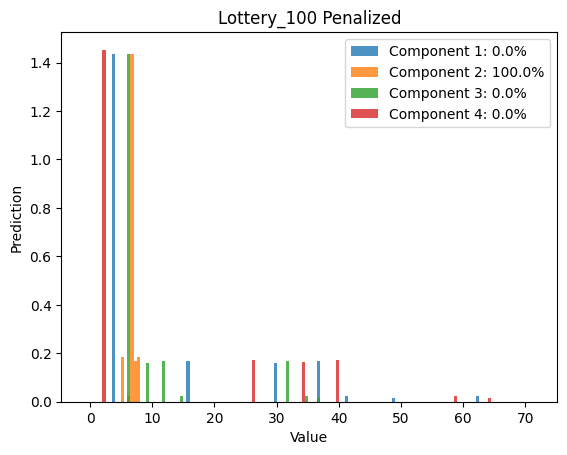

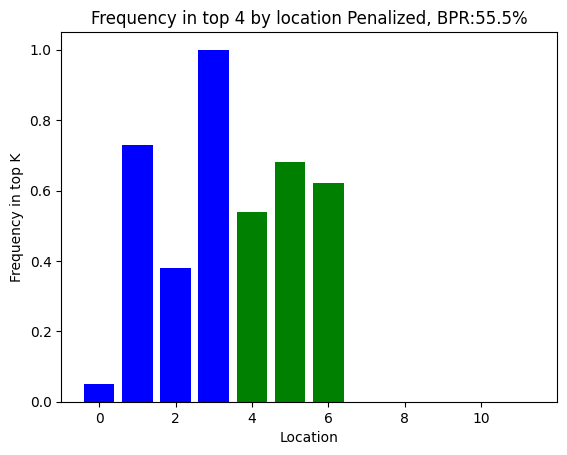

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


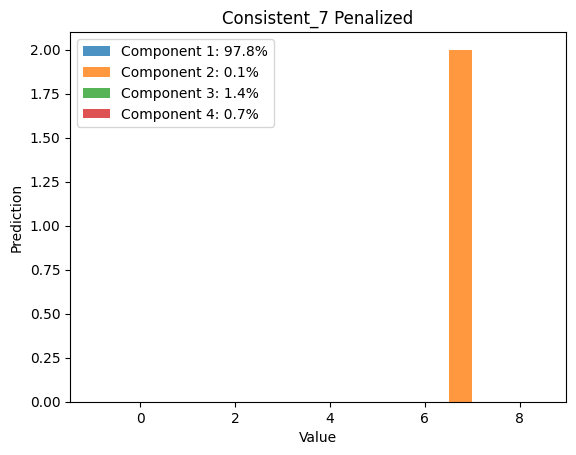

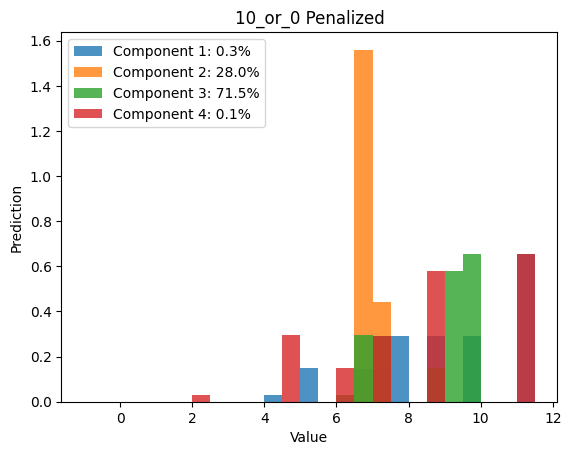

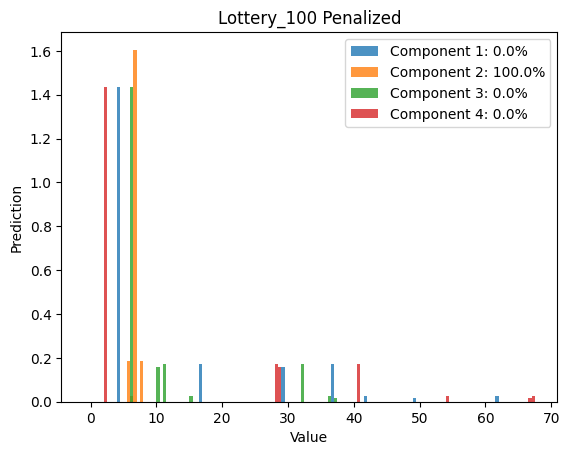

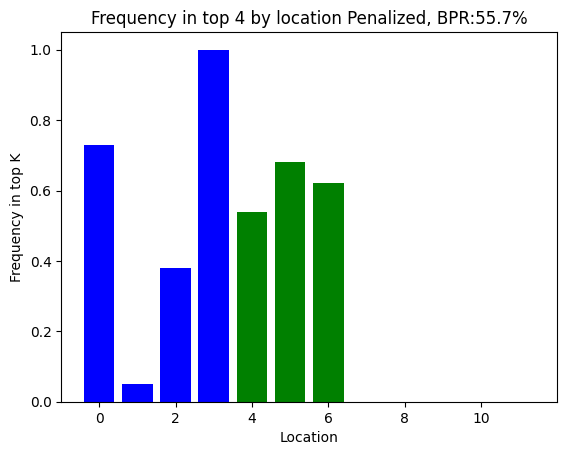

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


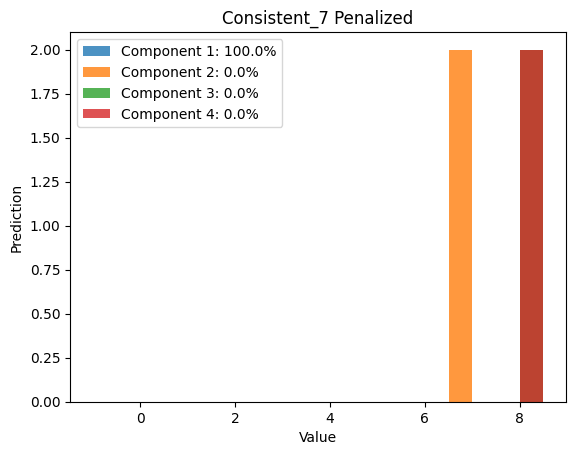

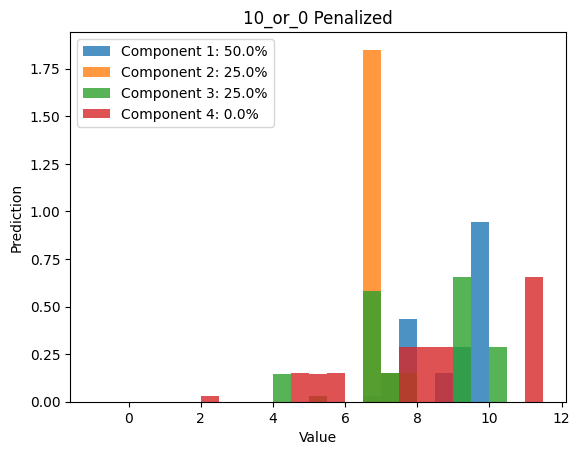

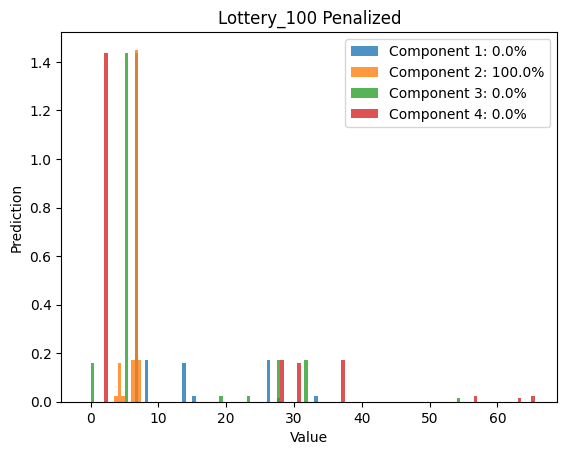

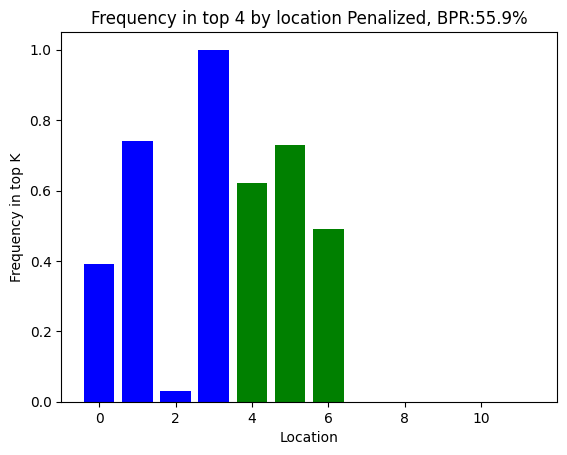

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


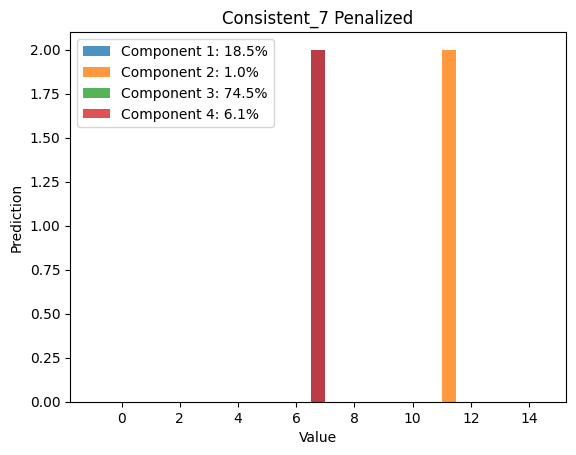

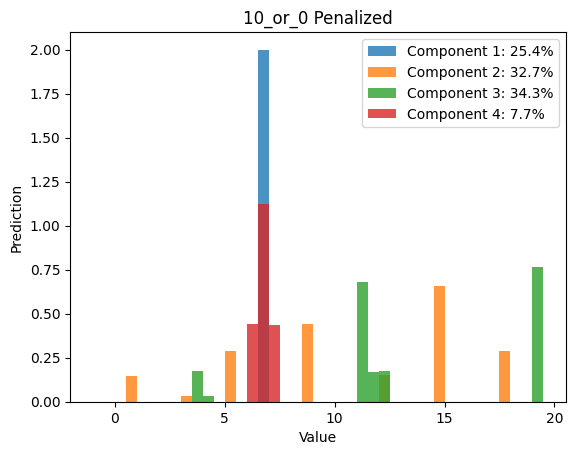

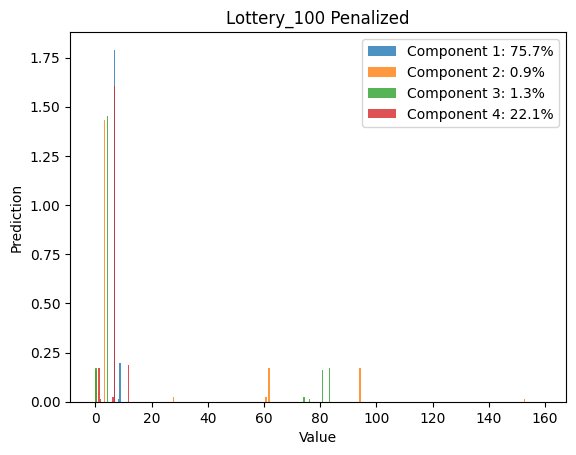

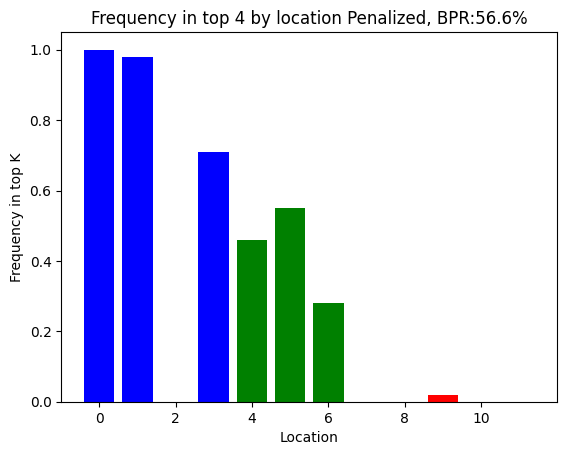

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


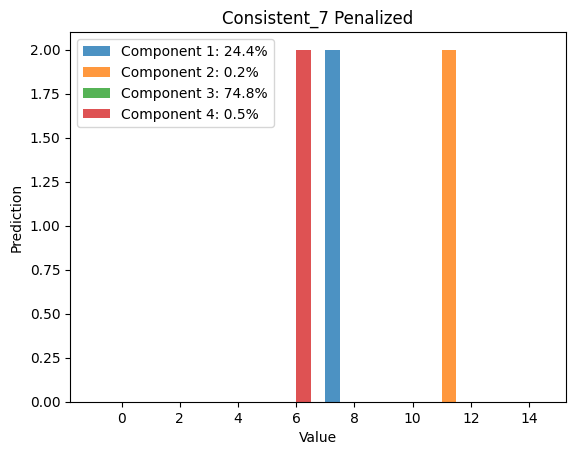

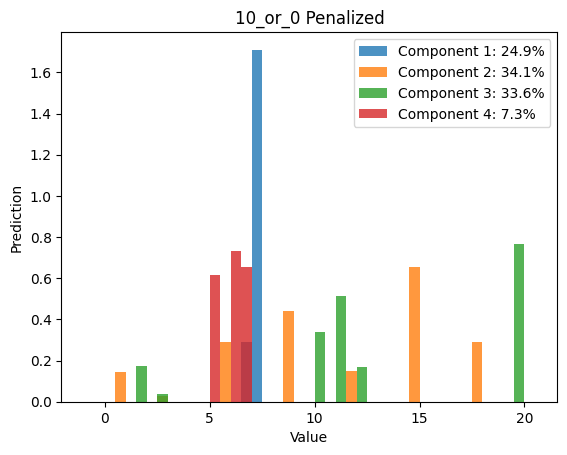

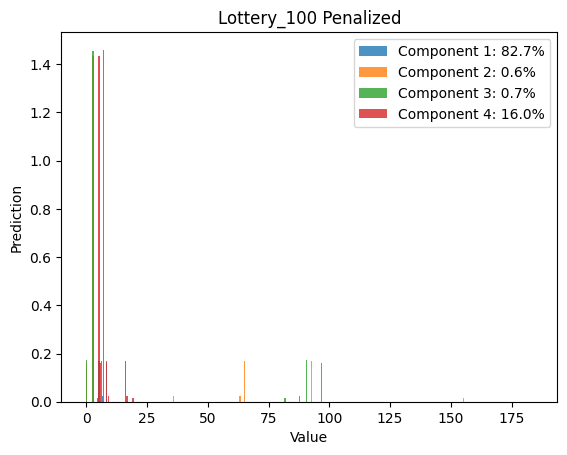

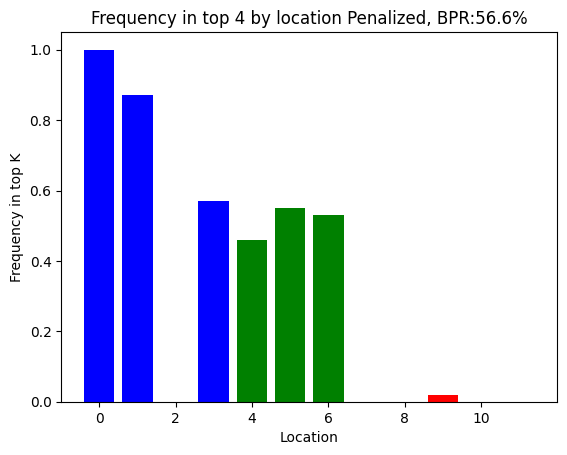

(4, 12)


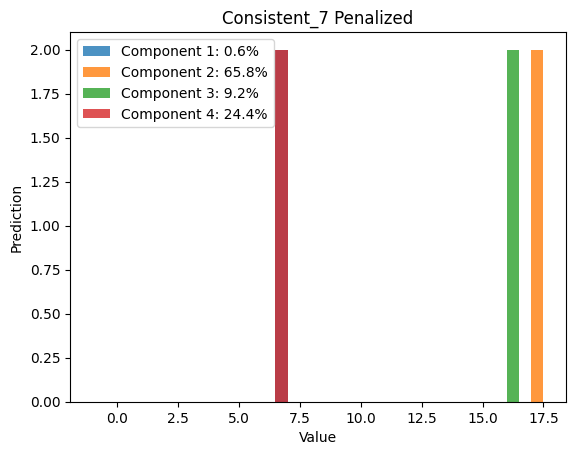

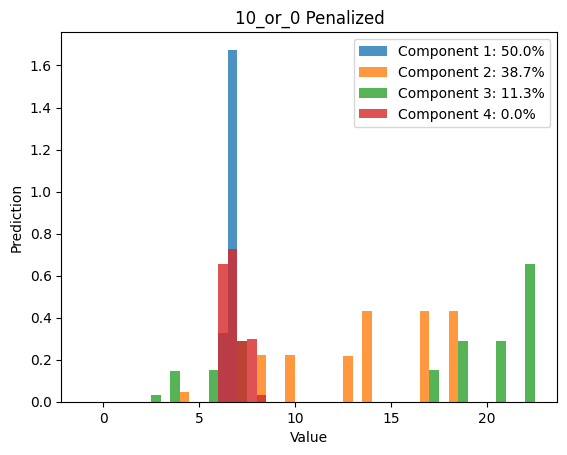

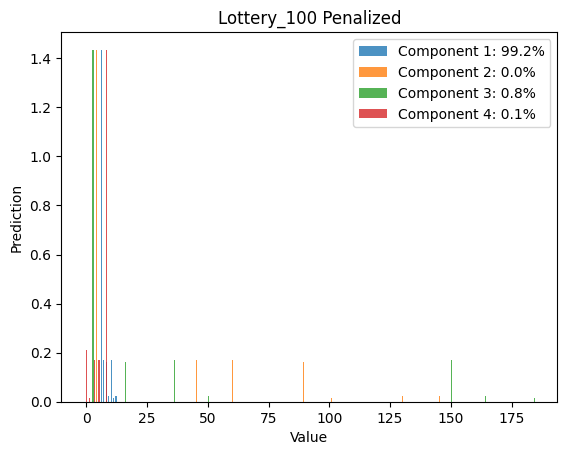

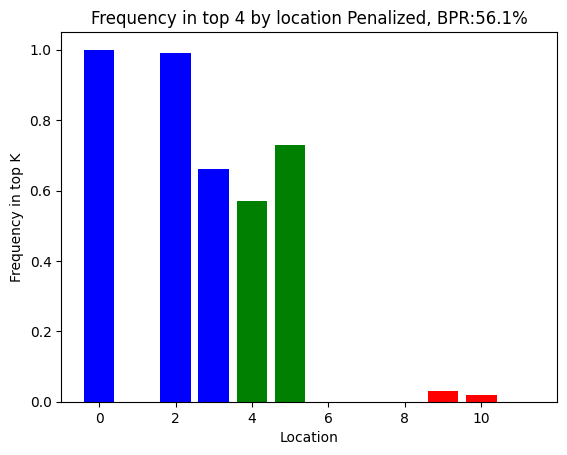

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


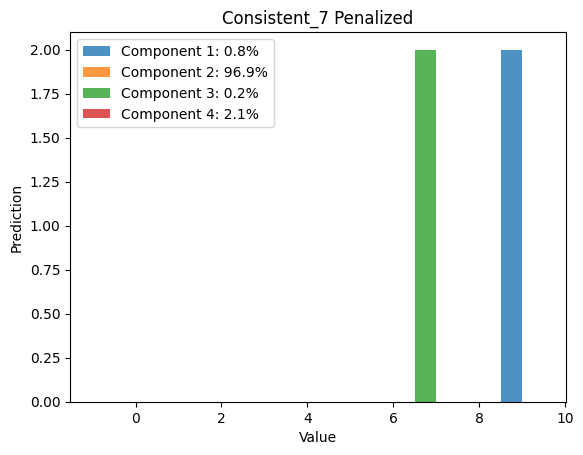

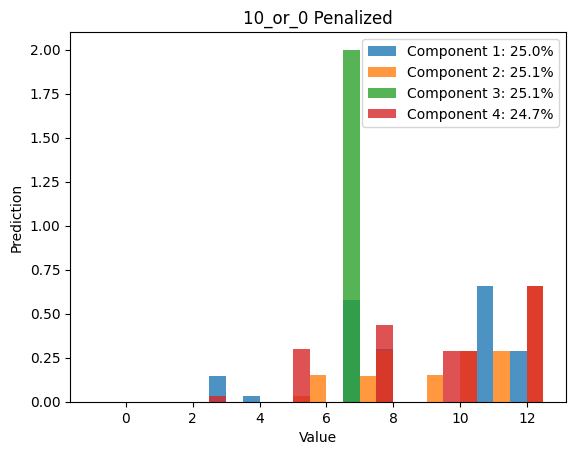

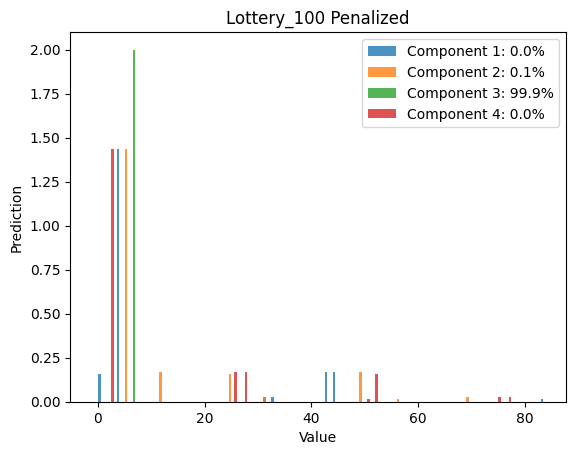

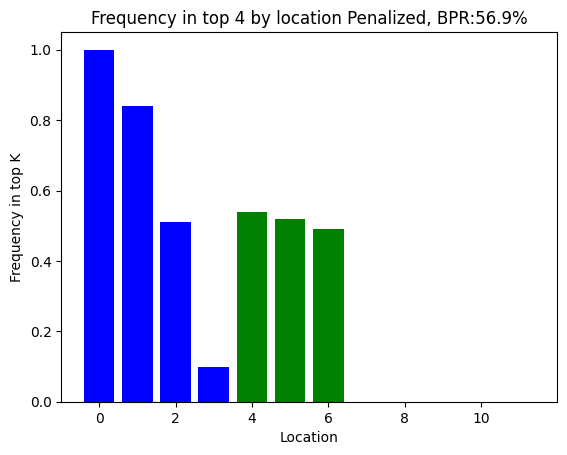

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


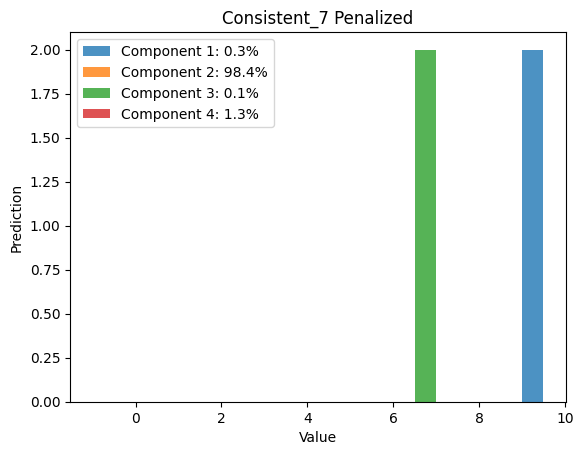

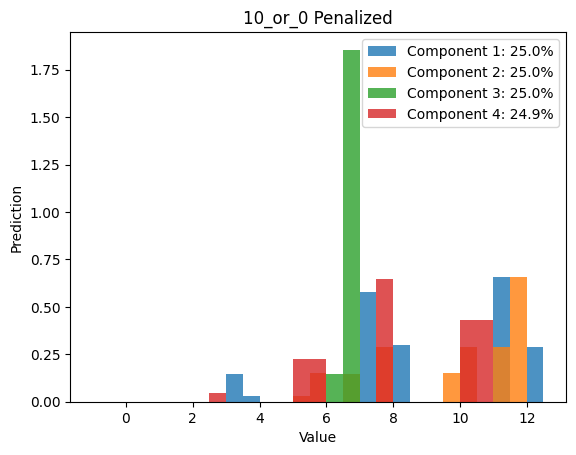

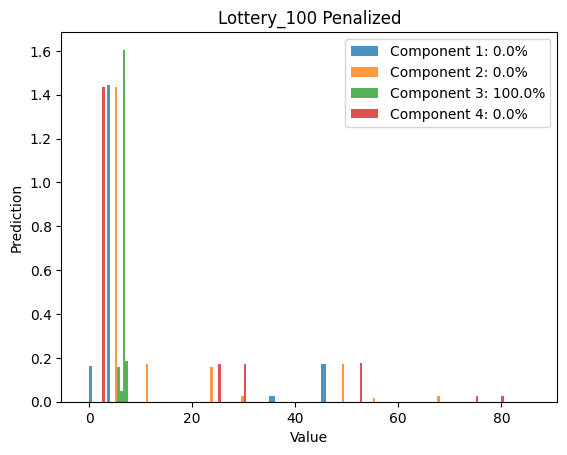

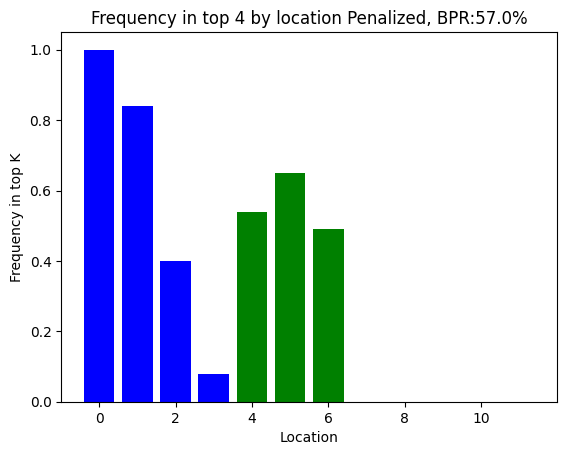

(4, 12)


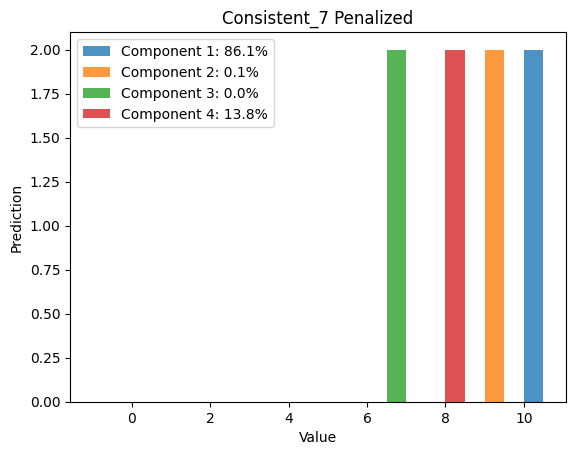

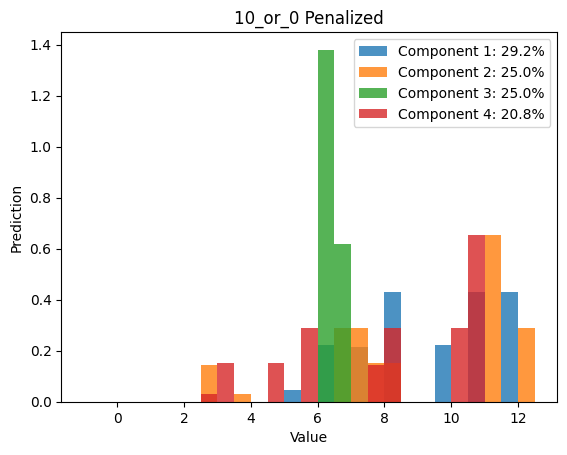

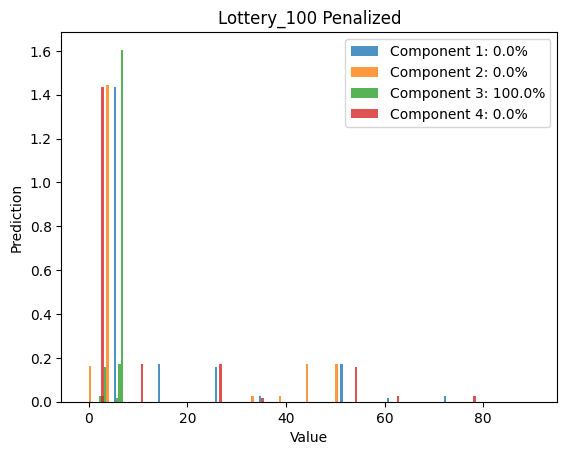

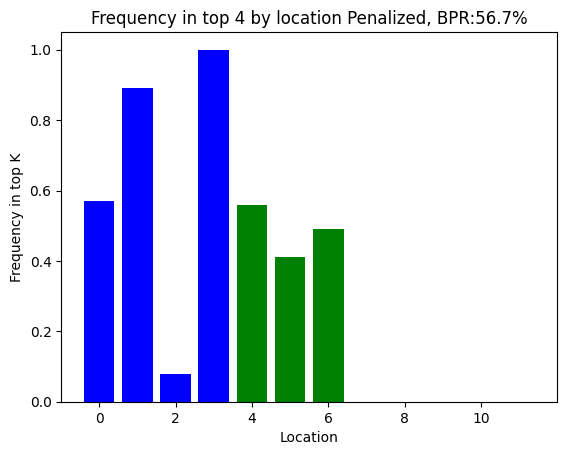

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


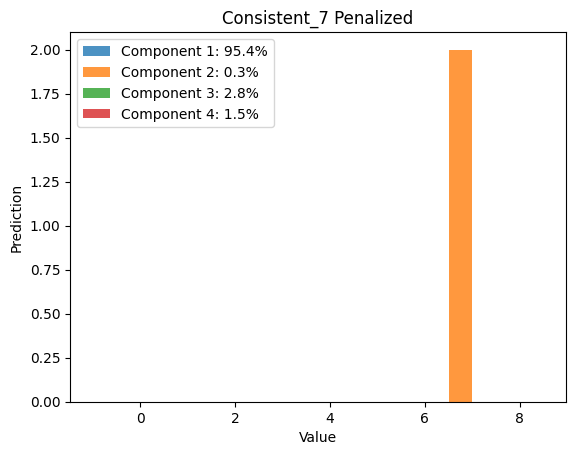

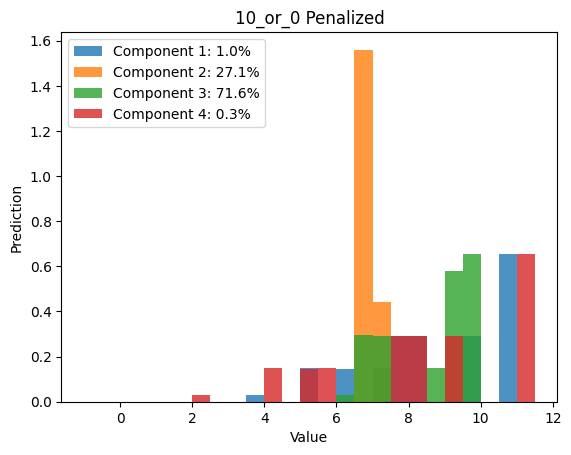

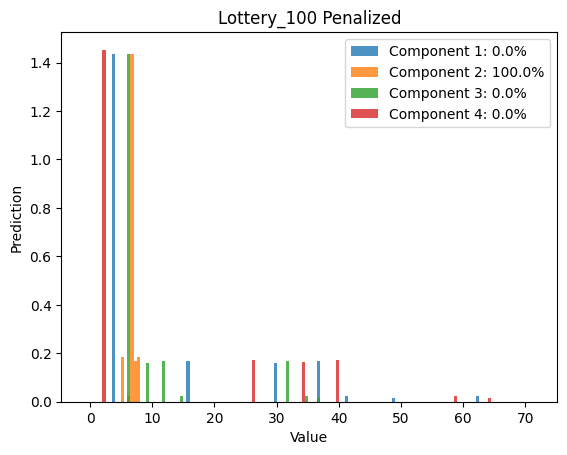

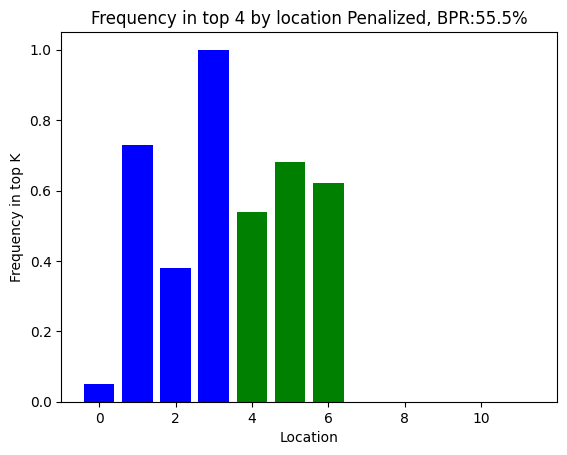

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


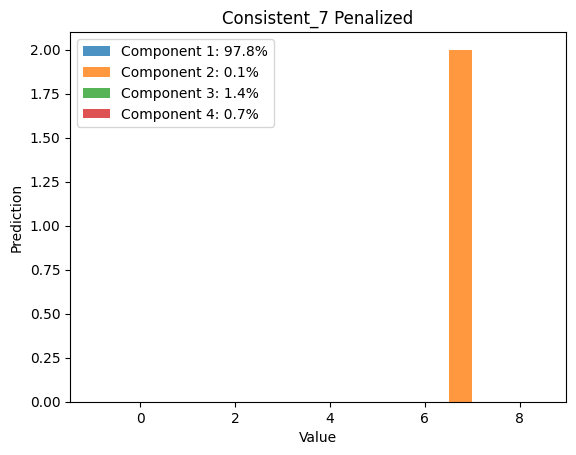

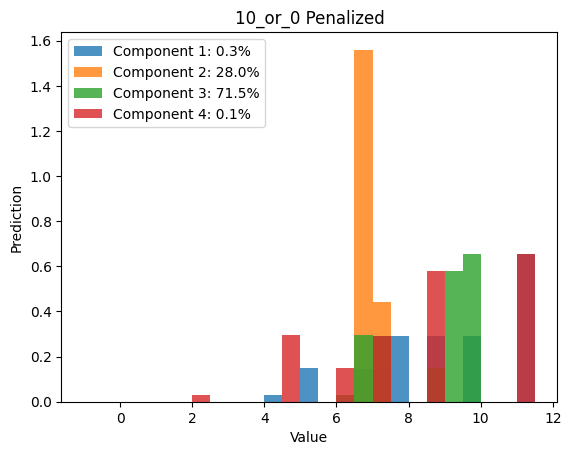

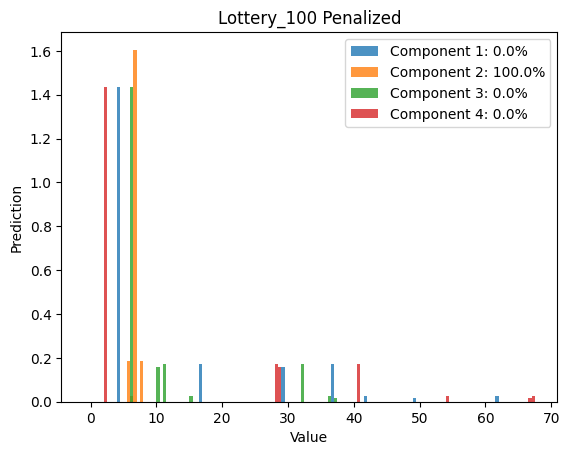

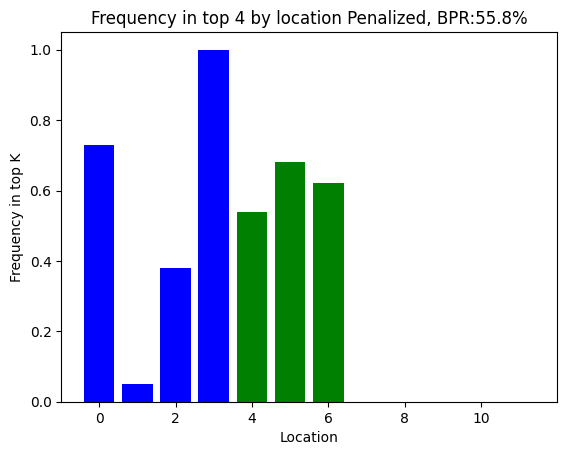

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


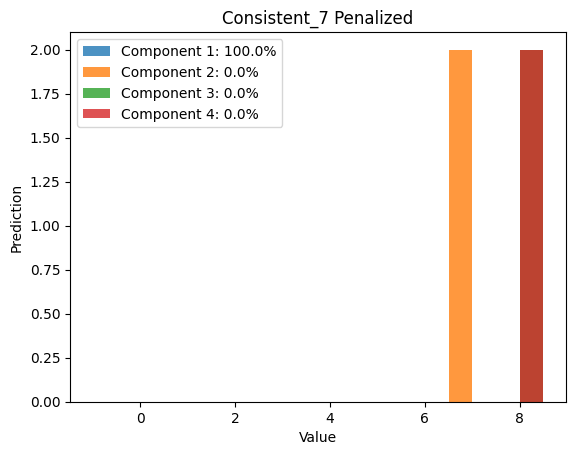

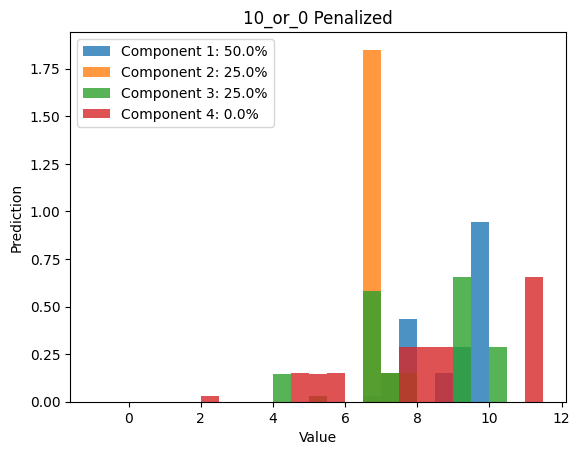

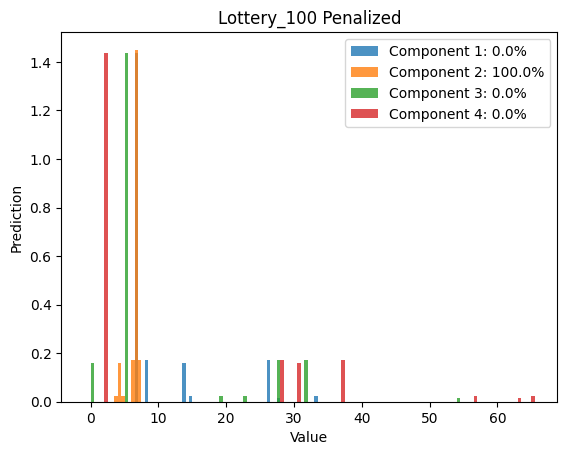

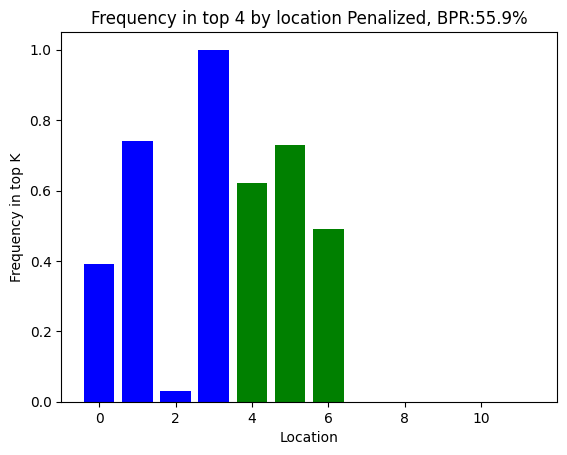

In [16]:
nlls_p = []
bprs_p = []
for model_path in penalized_models:
    model_dir = os.path.dirname(model_path)

    model = keras.models.load_model(model_path)
    y_preds = model(val_X_THS)

    nll = mixture_poi_loss(val_y_TS, y_preds)
    bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)
    plot_component_histograms(y_preds, title_add='Penalized',
                               save_dir=model_dir, file_add='penalized')
    # format bpr as percentage
    plot_winners(y_preds, K, title_add=f'Penalized, BPR:{-bpr*100:.1f}%',
                               save_dir=model_dir, file_add='penalized')


    nlls_p.append(tf.reduce_mean(nll))
    bprs_p.append(bpr)



/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.45_penalty50_lr0.005/bpr_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


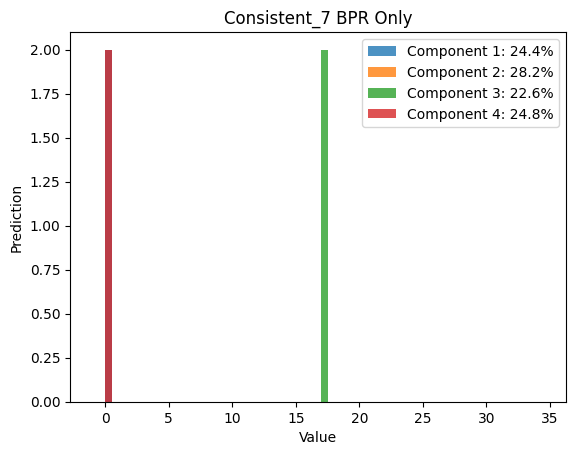

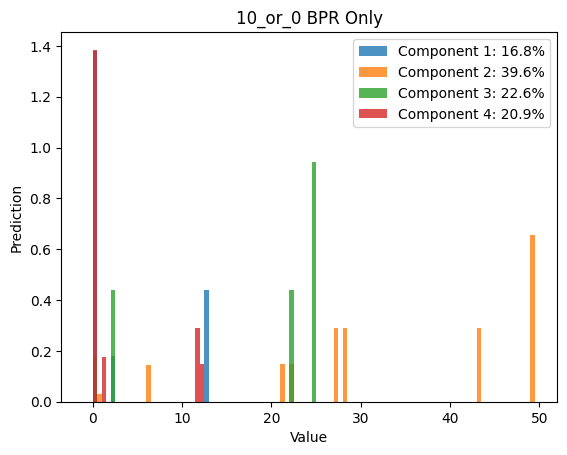

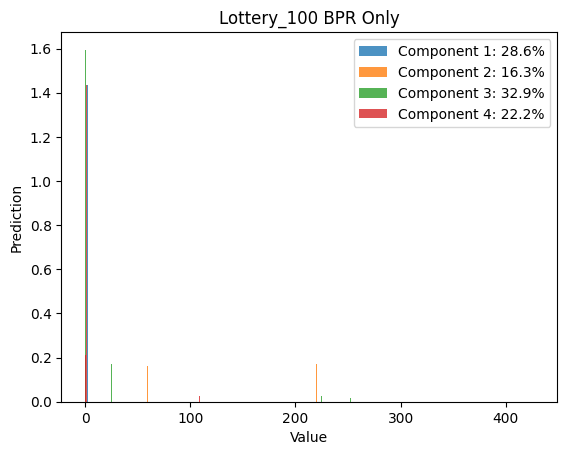

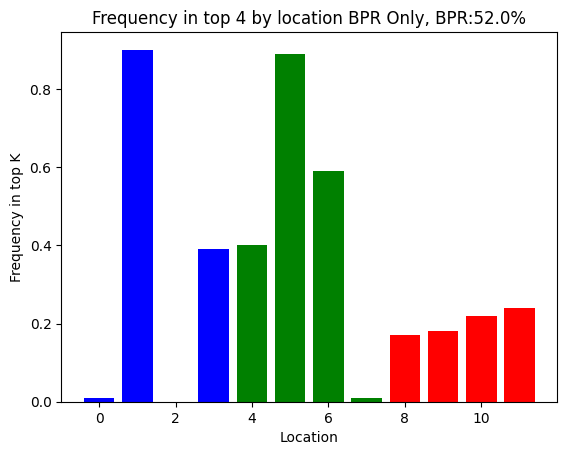

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.45_penalty50_lr0.01/bpr_only_model
(4, 12)


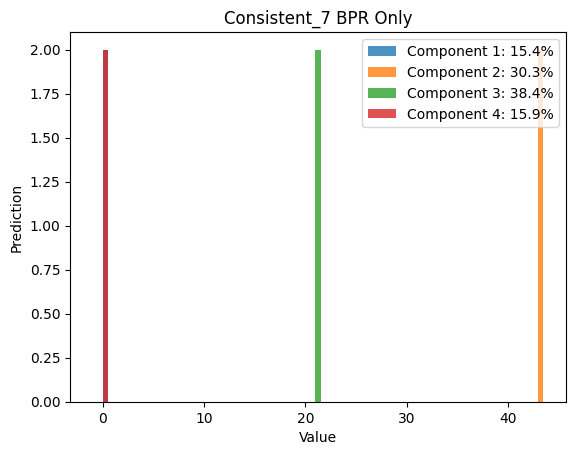

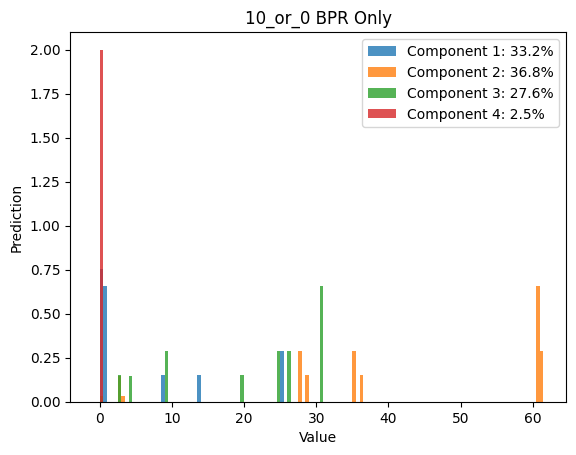

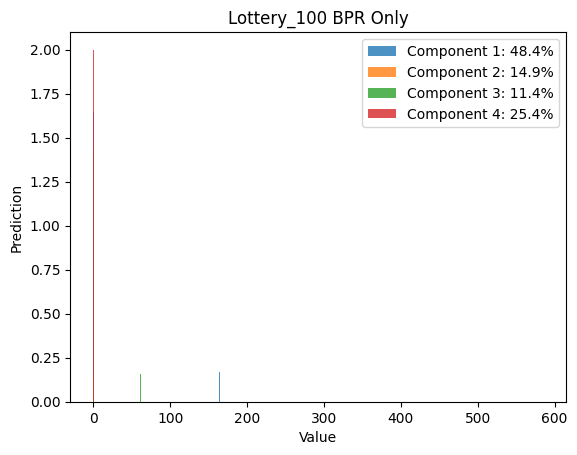

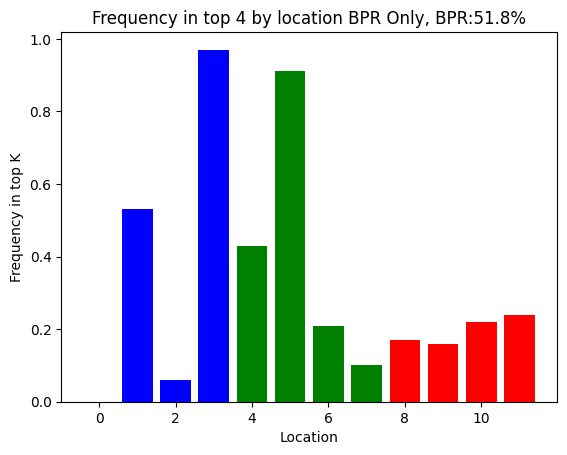

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.45_penalty50_lr0.05/bpr_only_model
(4, 12)


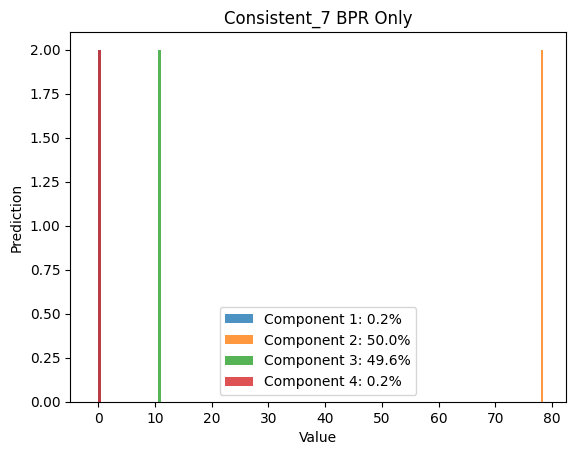

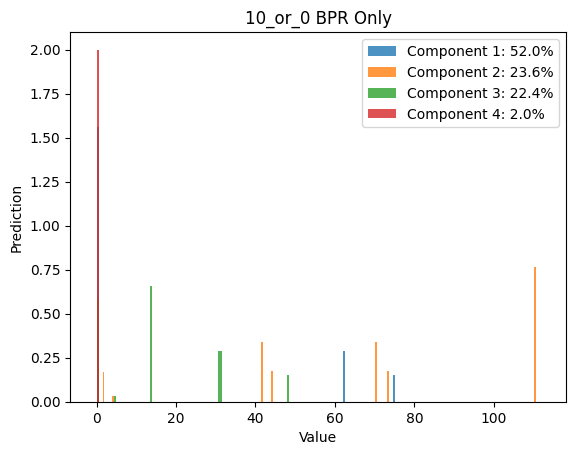

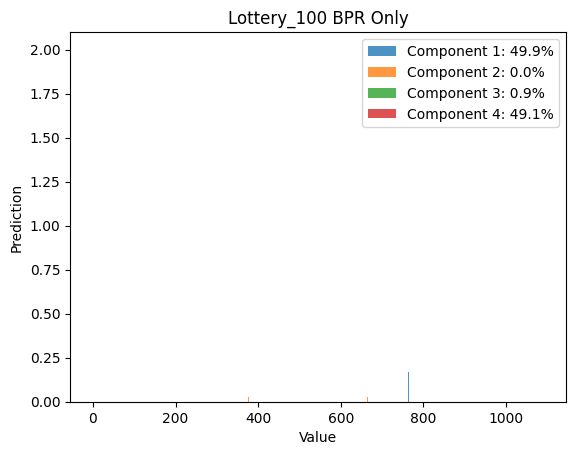

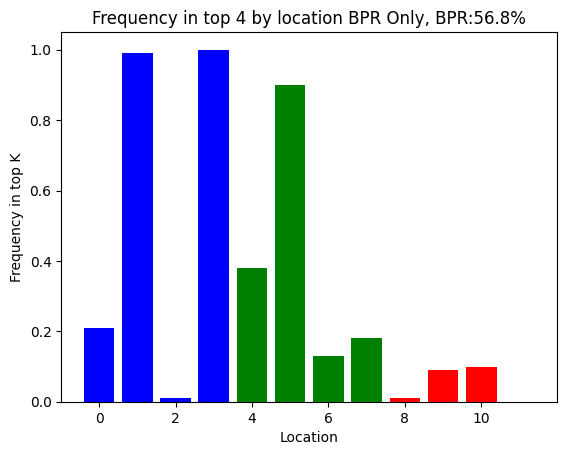

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.6_penalty50_lr0.005/bpr_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


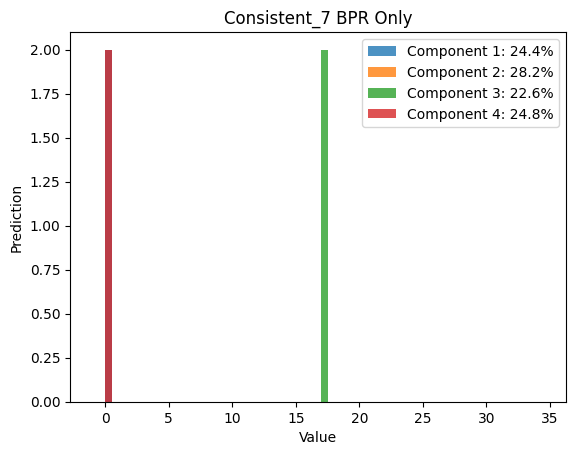

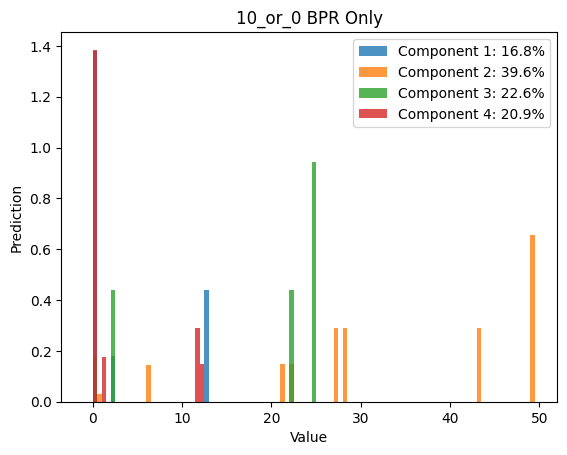

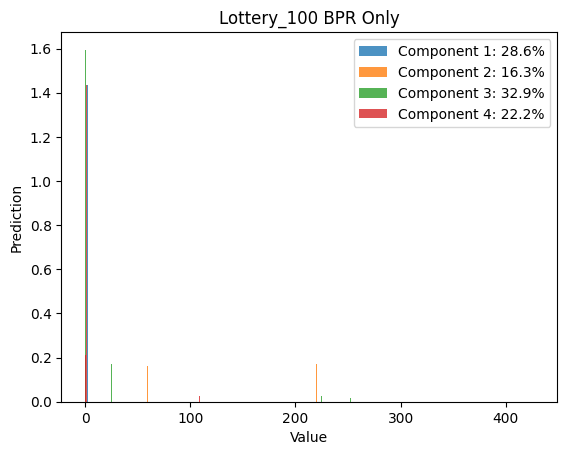

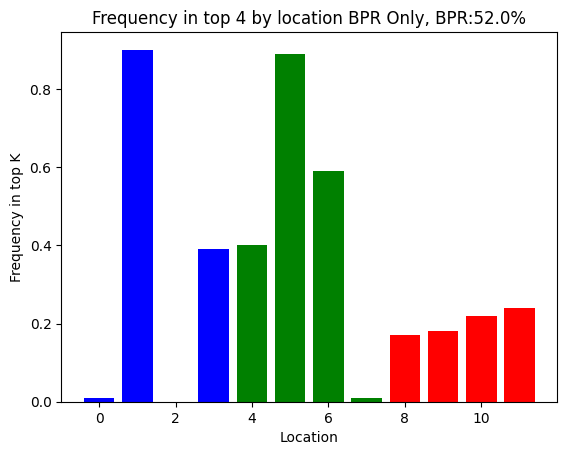

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.6_penalty50_lr0.01/bpr_only_model
(4, 12)


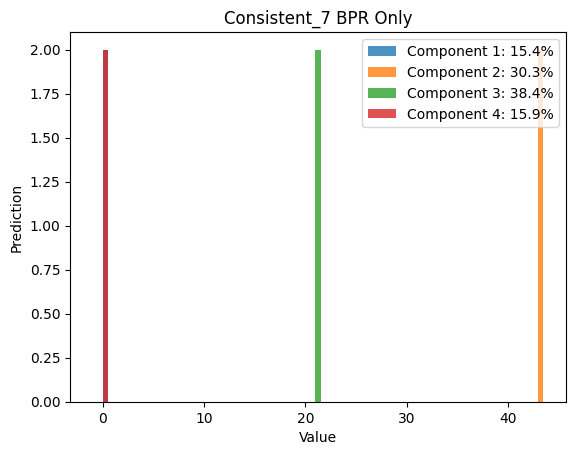

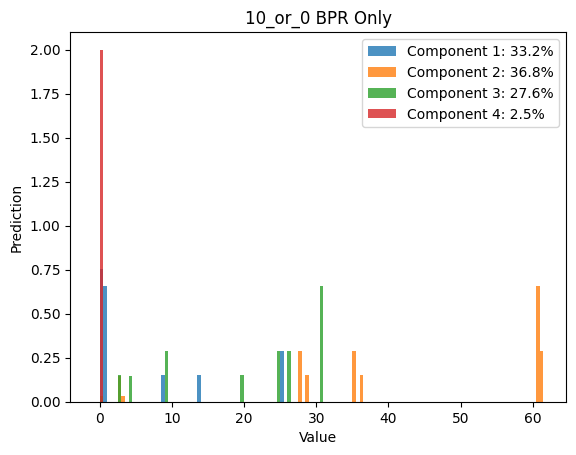

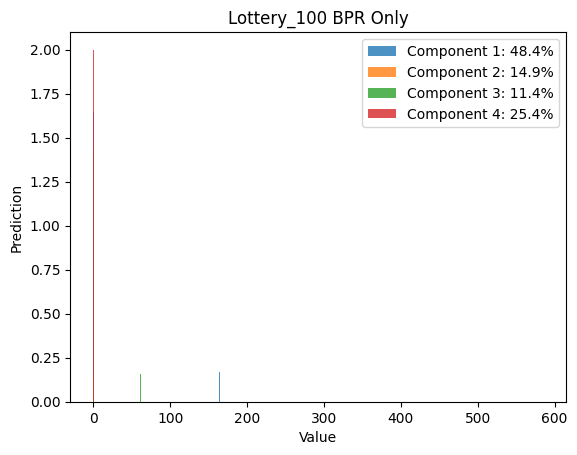

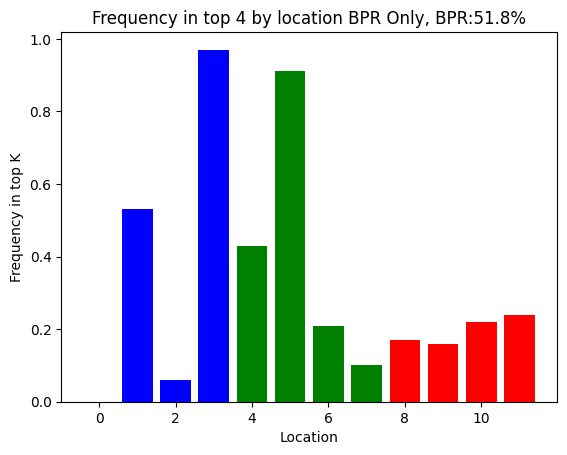

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.6_penalty50_lr0.05/bpr_only_model
(4, 12)


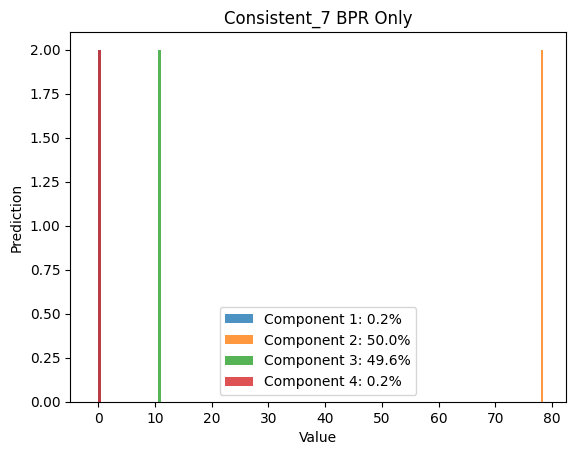

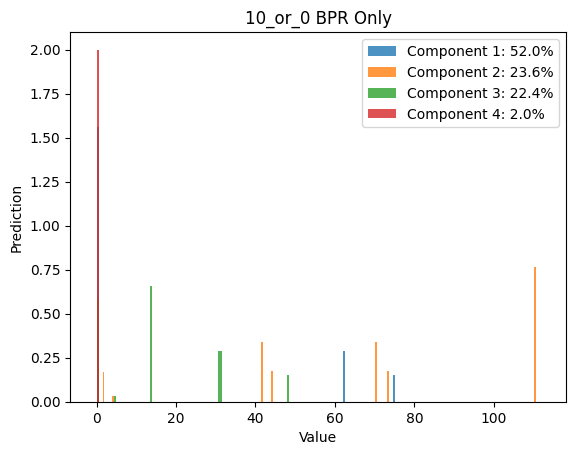

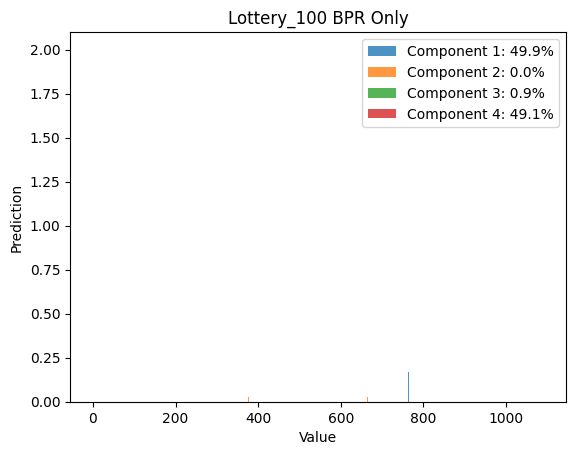

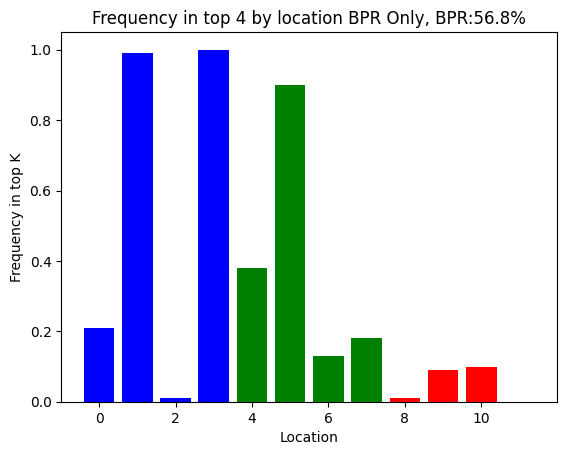

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.005/bpr_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


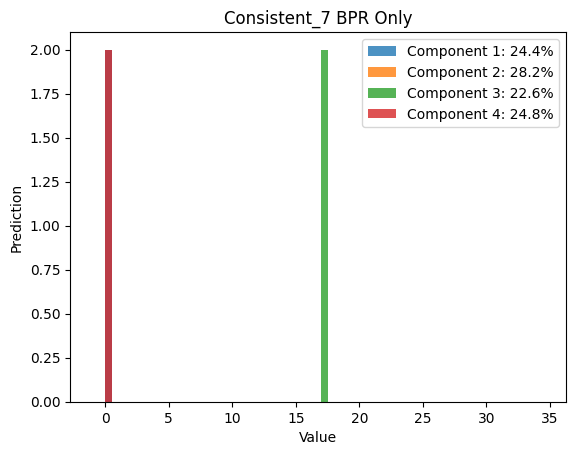

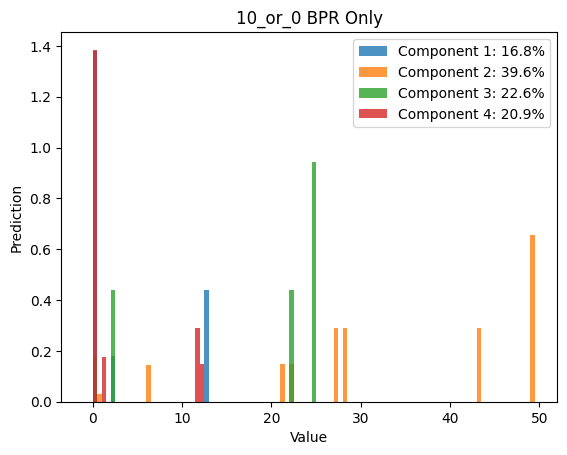

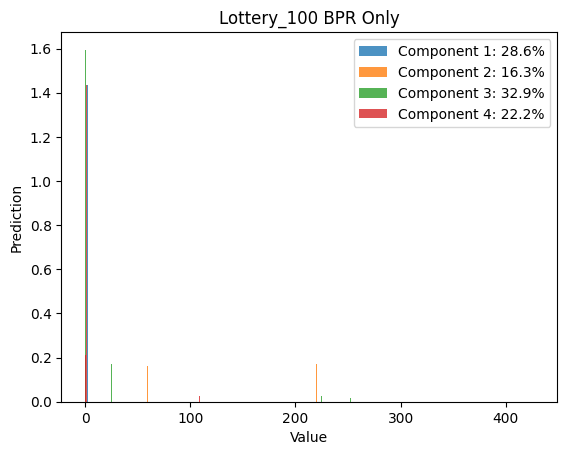

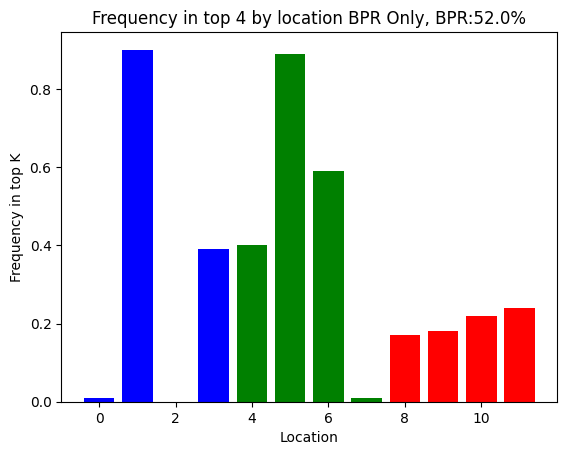

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.01/bpr_only_model
(4, 12)


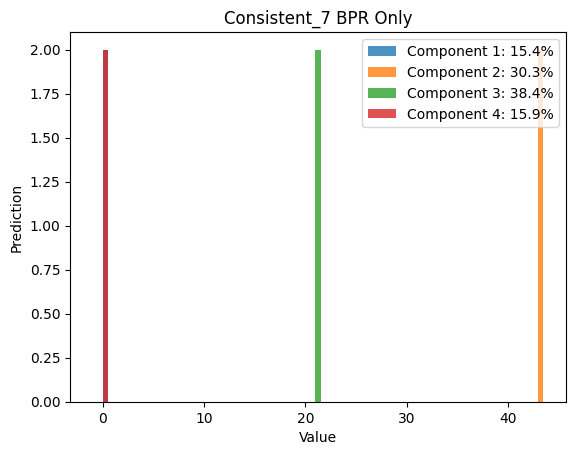

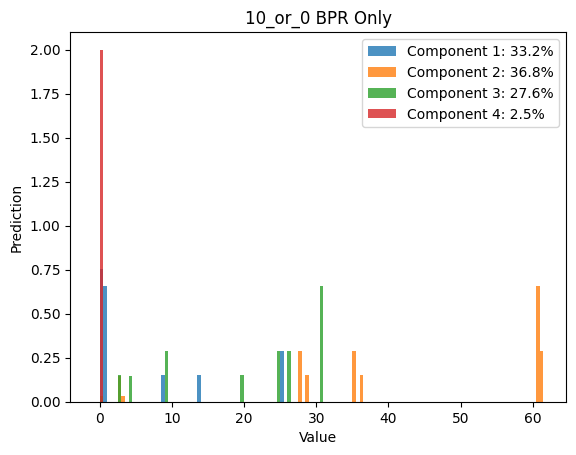

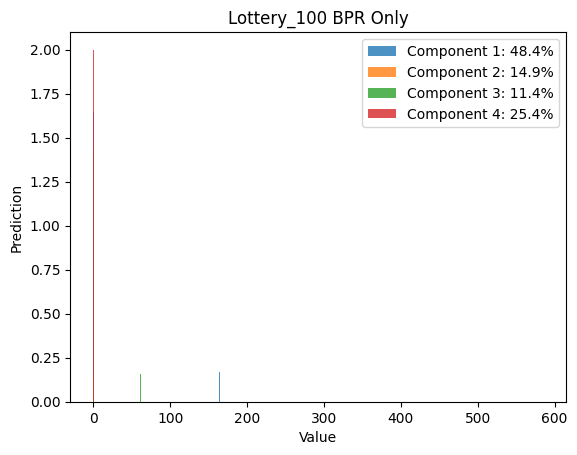

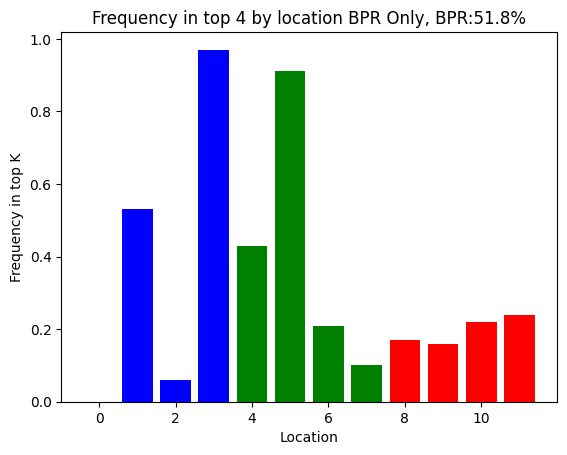

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.05/bpr_only_model
(4, 12)


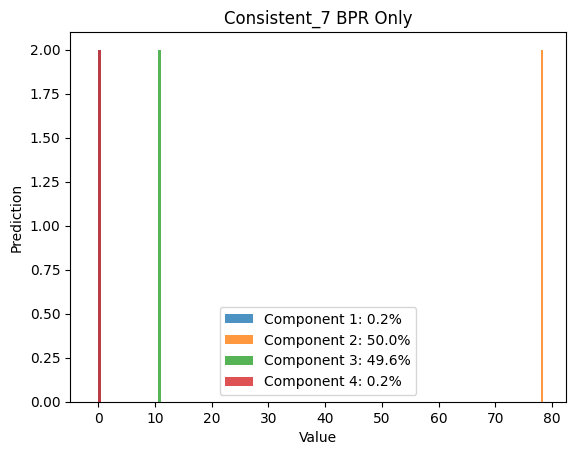

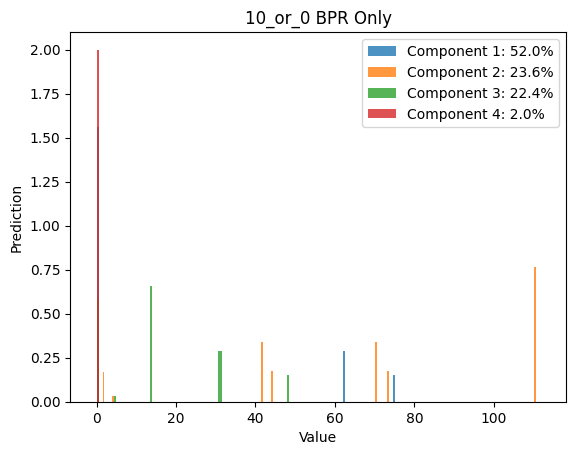

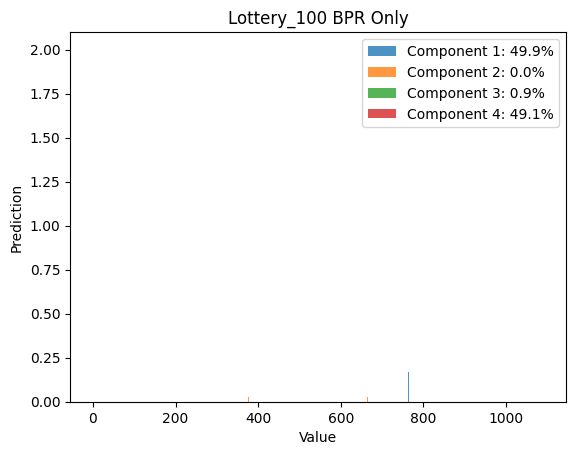

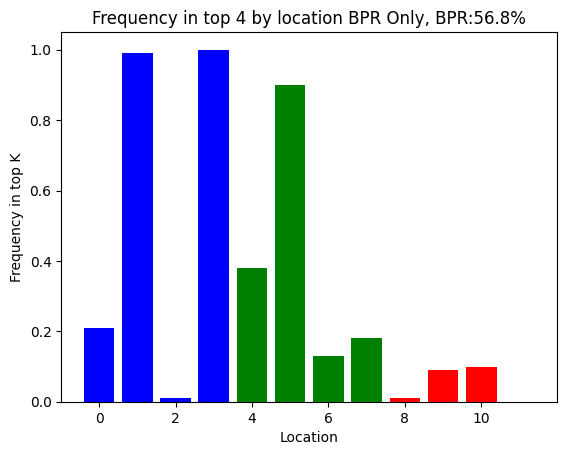

In [17]:
nlls_b = []
bprs_b = []
for model_path in bpr_models:
    model_dir = os.path.dirname(model_path)
    print(model_path)

    model = keras.models.load_model(model_path)
    y_preds = model(val_X_THS)

    nll = mixture_poi_loss(val_y_TS, y_preds)
    bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)
    plot_component_histograms(y_preds, title_add='BPR Only',
                               save_dir=model_dir, file_add='bpr')
    plot_winners(y_preds, K, title_add=f'BPR Only, BPR:{-bpr*100:.1f}%',
                               save_dir=model_dir, file_add='bpr')

    nlls_b.append(tf.reduce_mean(nll))
    bprs_b.append(bpr)



/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.45_penalty50_lr0.005/nll_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


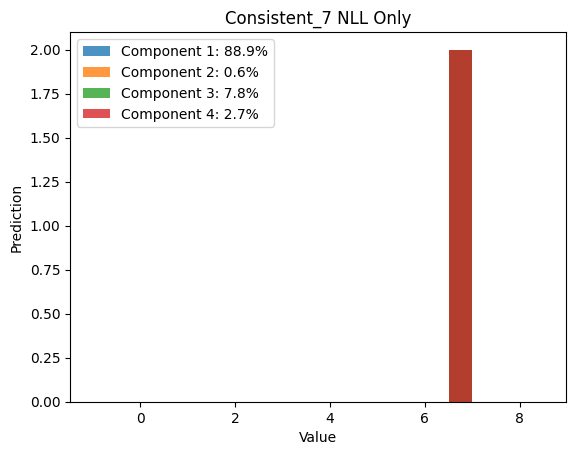

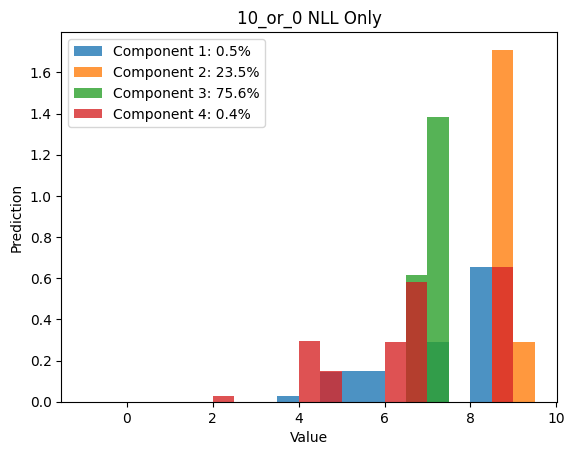

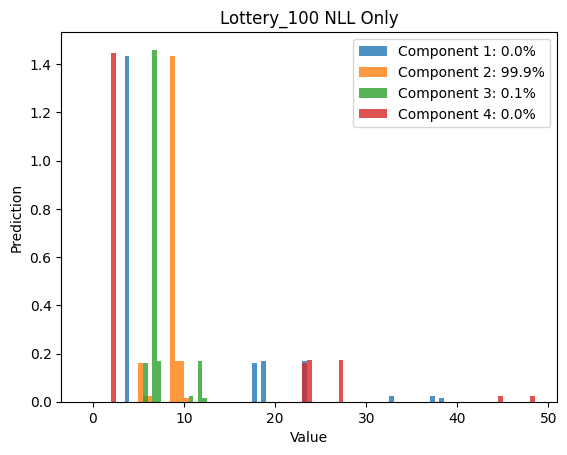

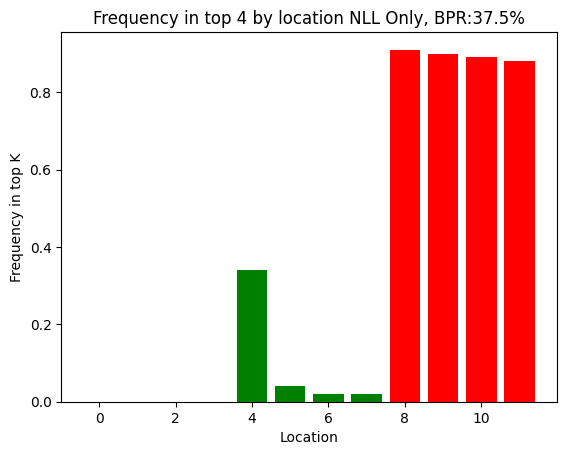

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.45_penalty50_lr0.01/nll_only_model
(4, 12)


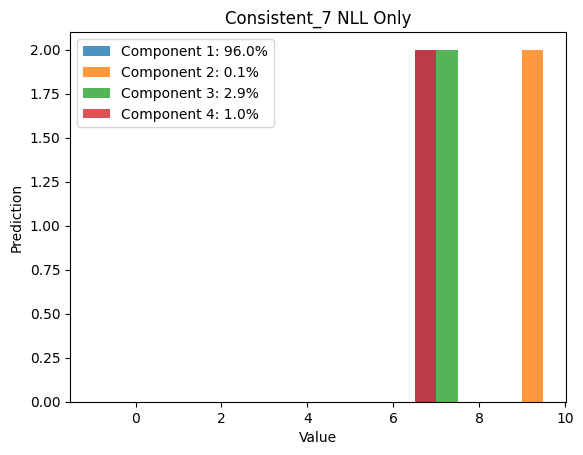

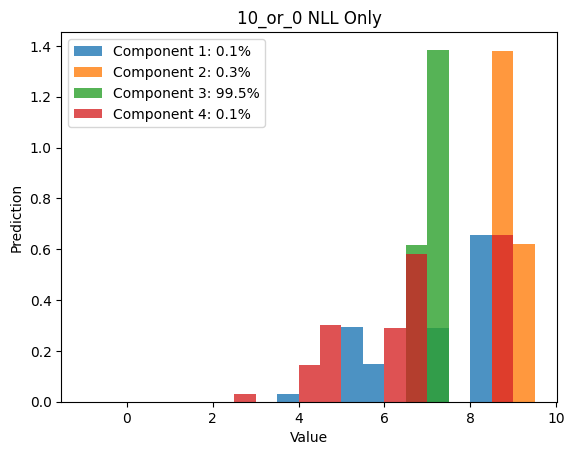

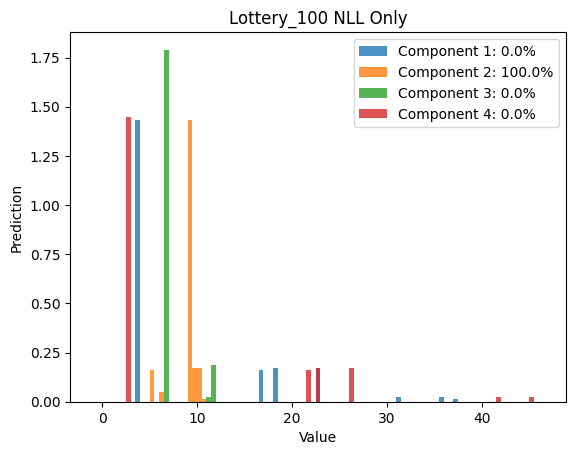

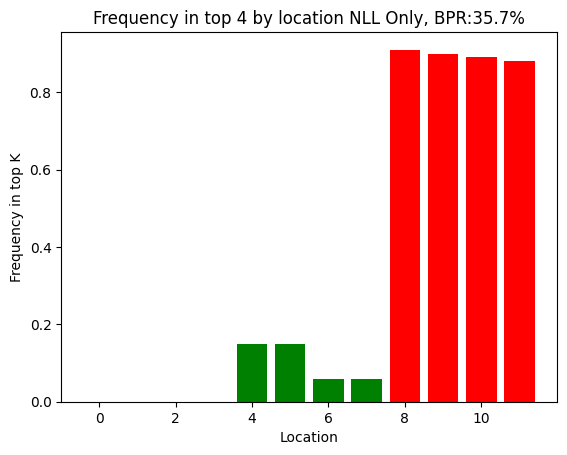

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.45_penalty50_lr0.05/nll_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


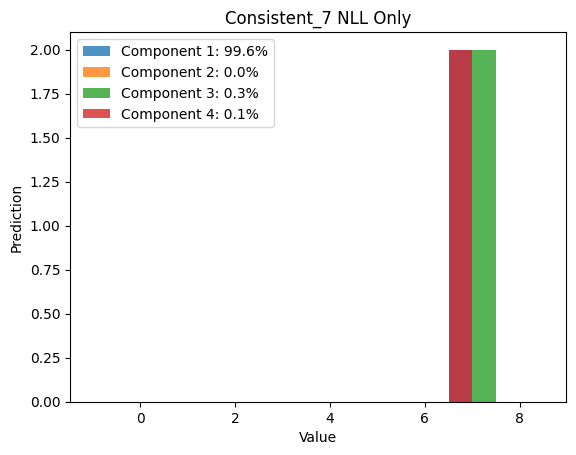

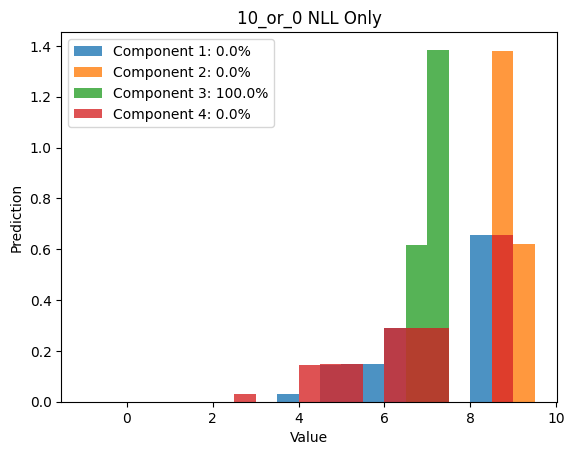

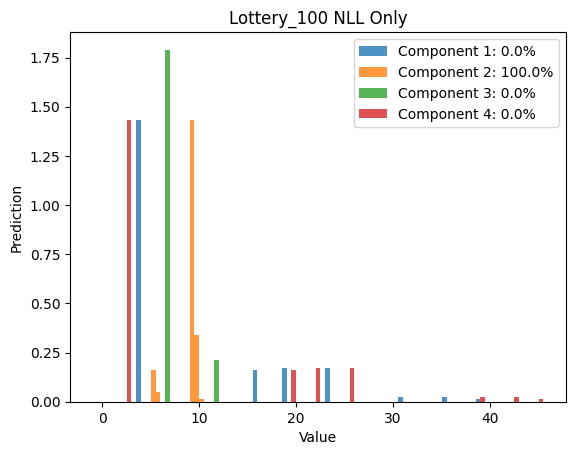

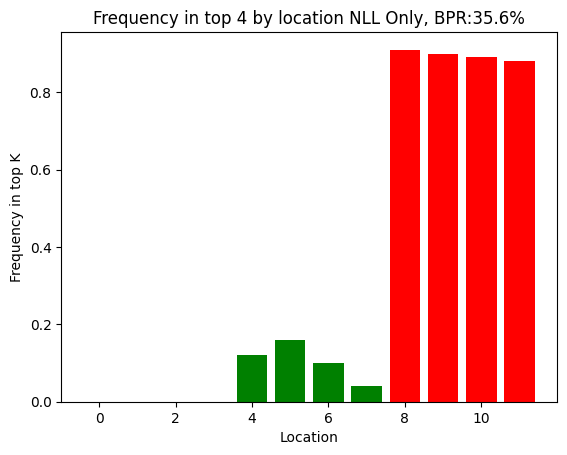

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.6_penalty50_lr0.005/nll_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


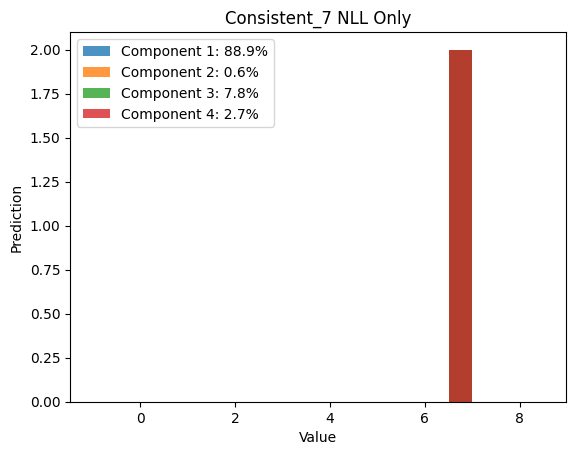

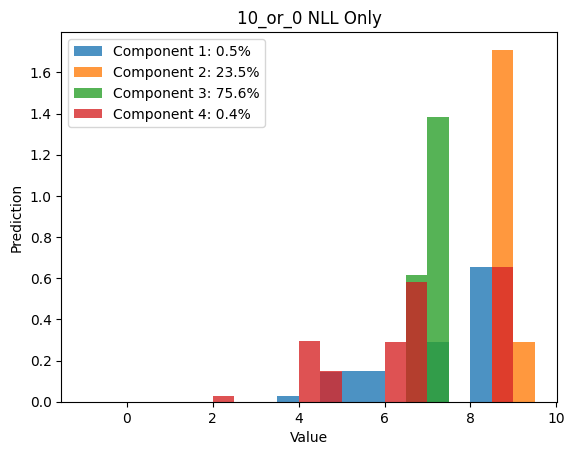

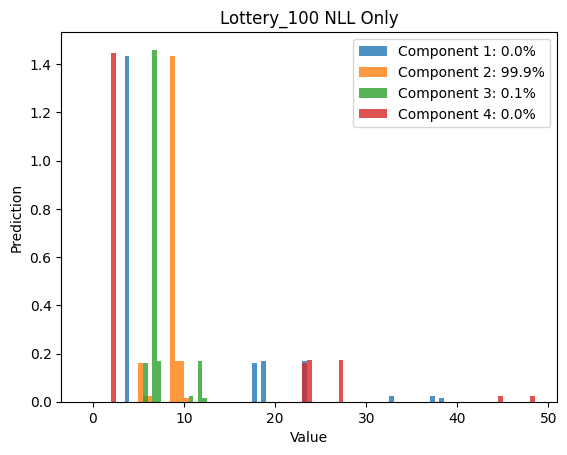

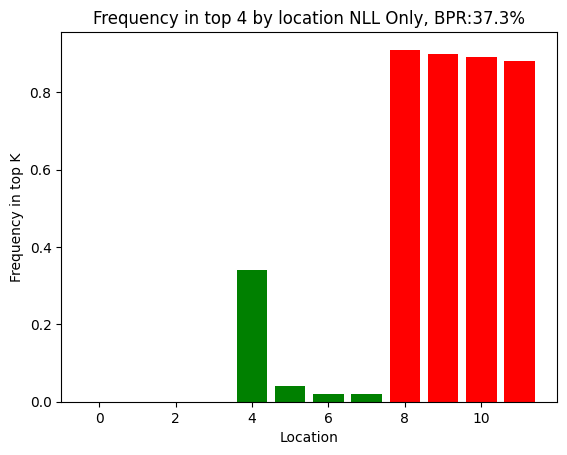

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.6_penalty50_lr0.01/nll_only_model
(4, 12)


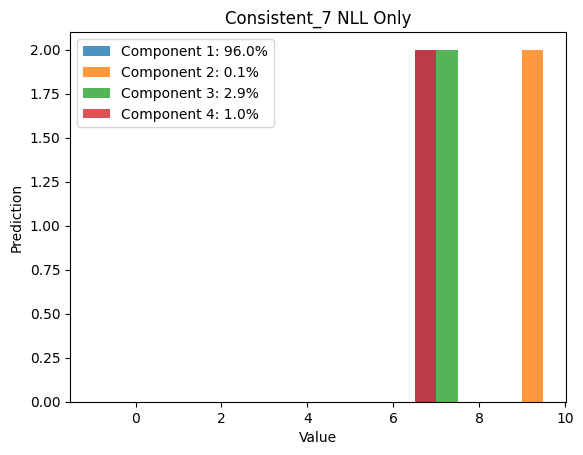

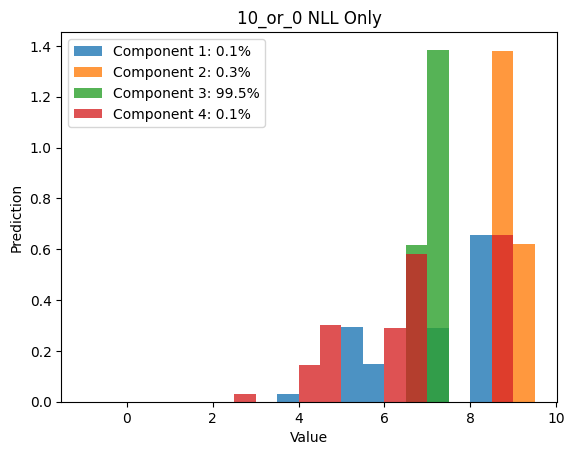

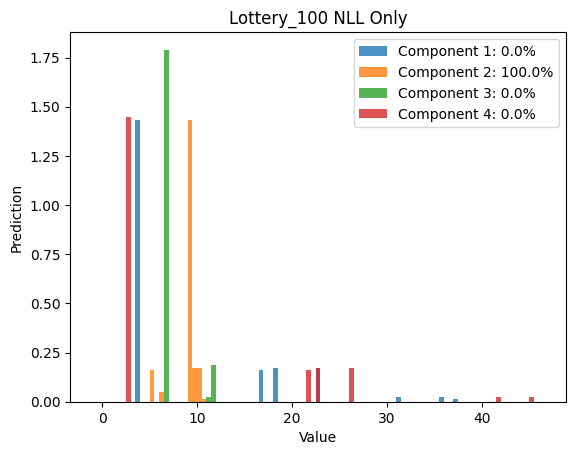

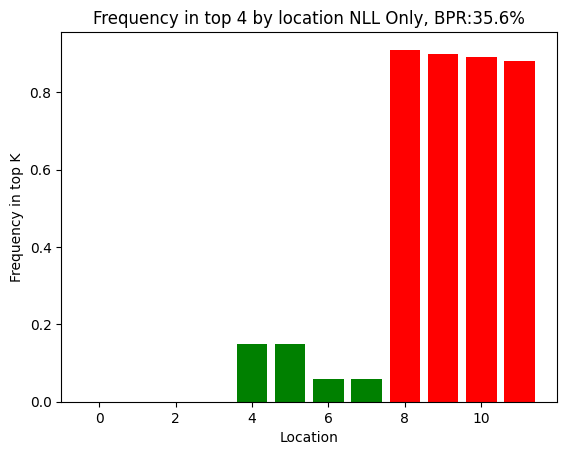

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.6_penalty50_lr0.05/nll_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


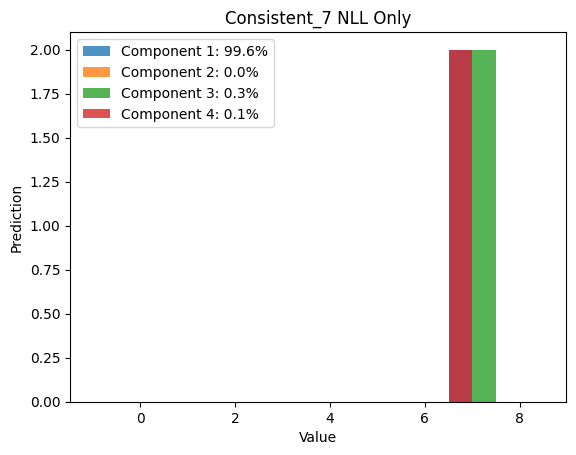

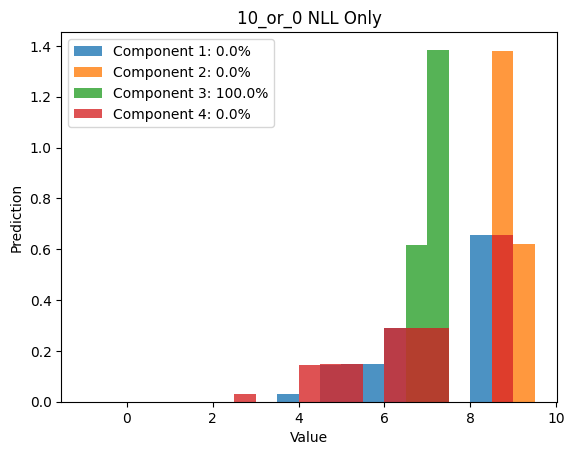

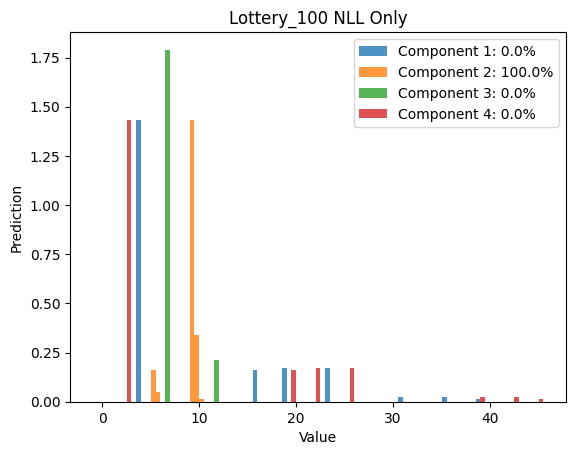

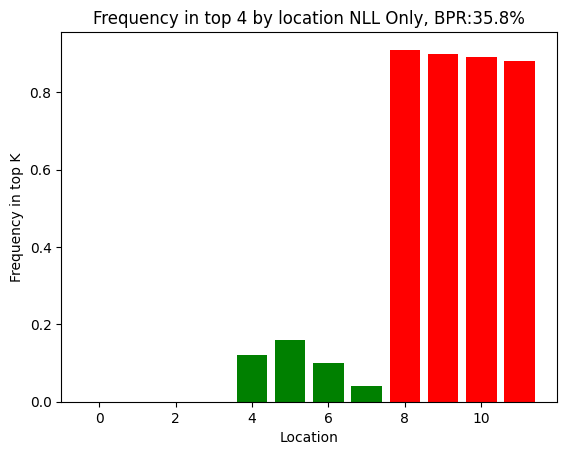

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.005/nll_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


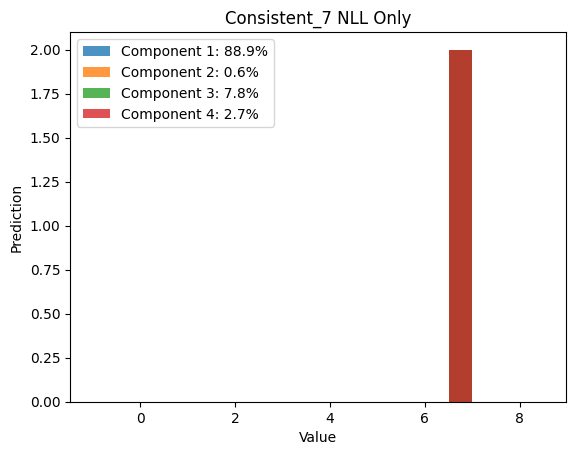

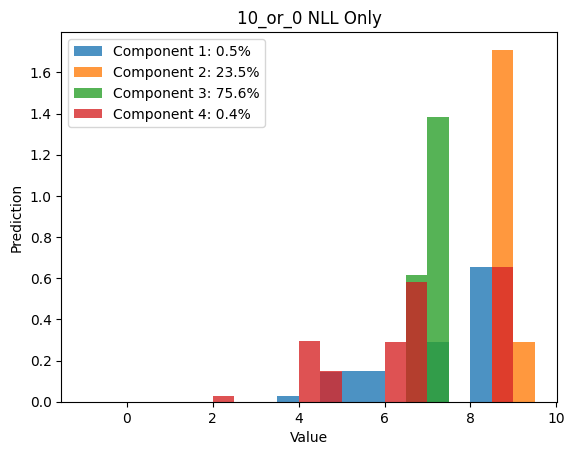

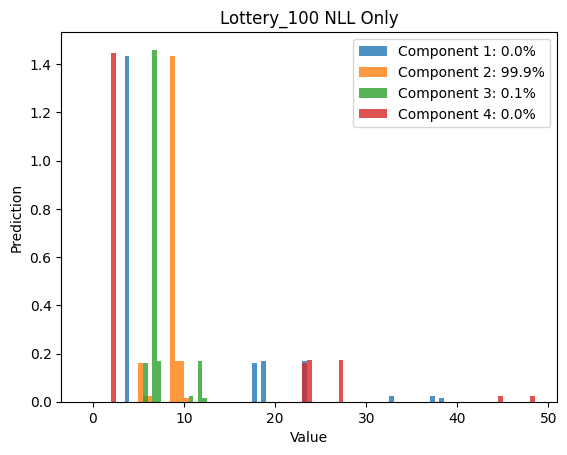

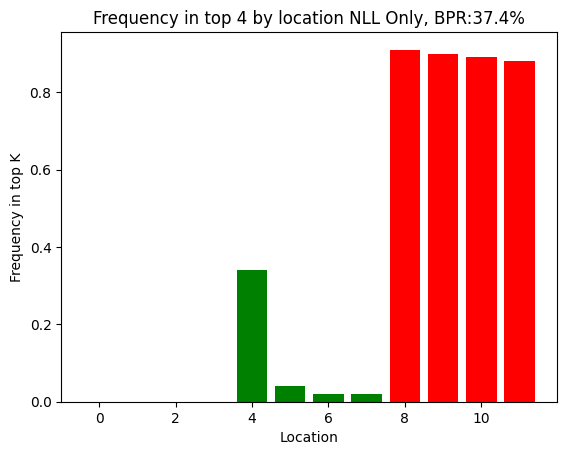

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.01/nll_only_model
(4, 12)


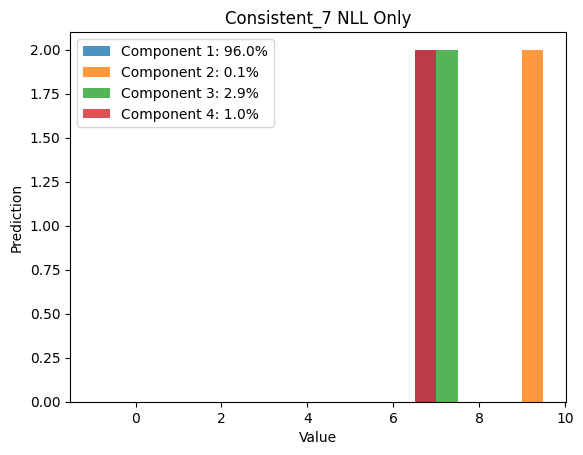

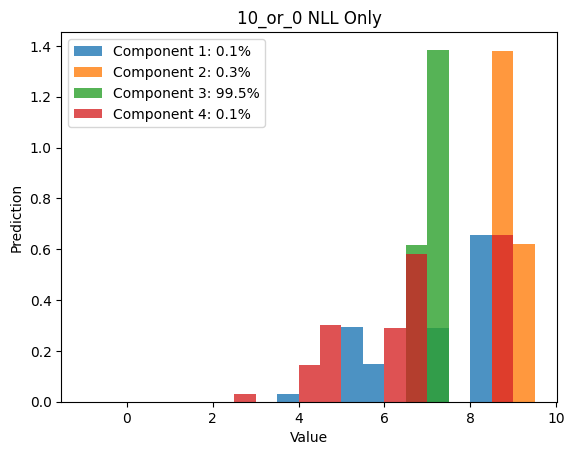

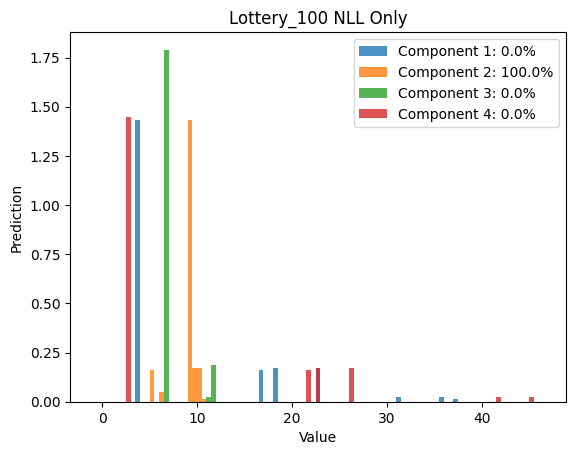

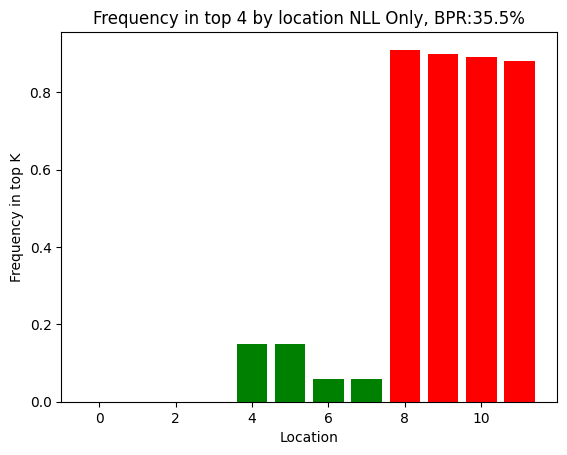

/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.05/nll_only_model
(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


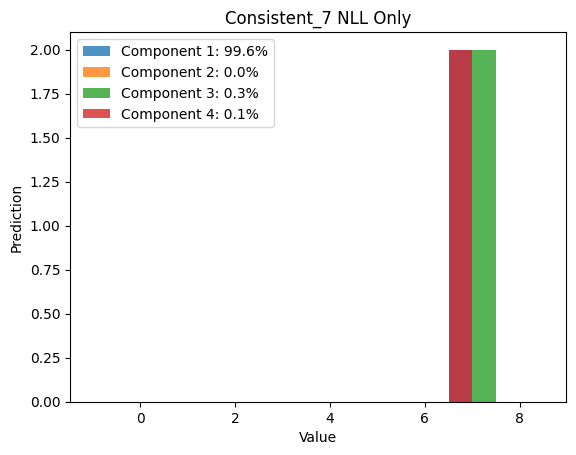

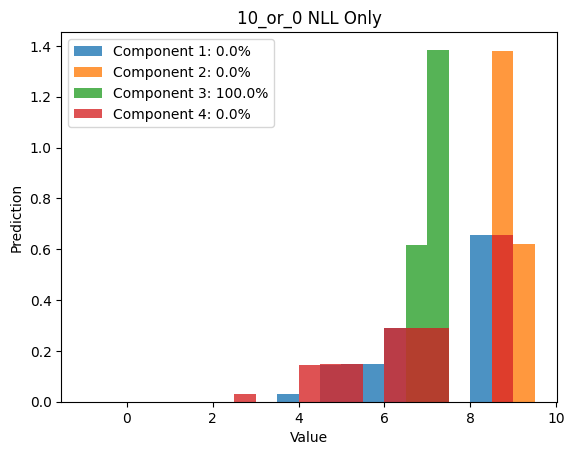

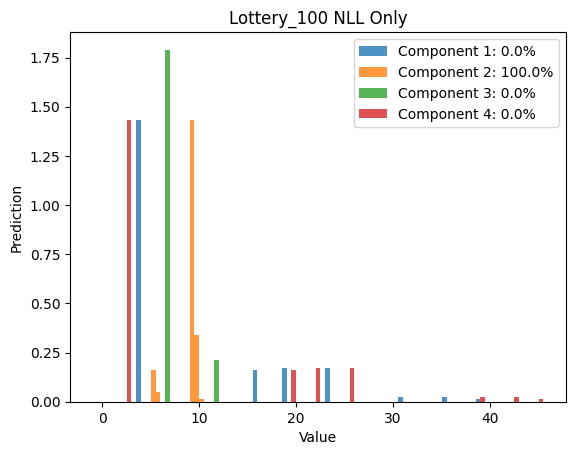

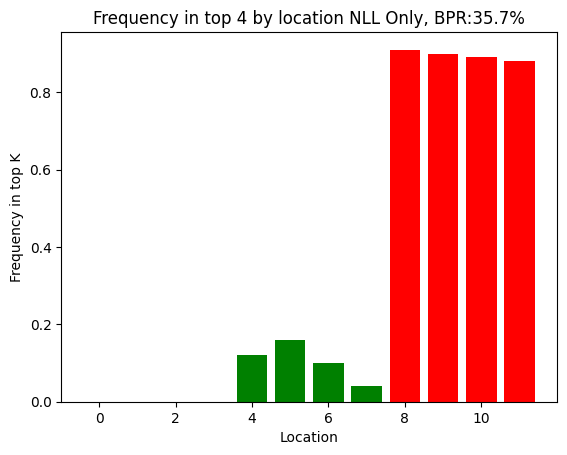

In [18]:
nlls_n = []
bprs_n = []
for model_path in nll_models:
    model_dir = os.path.dirname(model_path)
    print(model_path)

    model = keras.models.load_model(model_path)
    y_preds = model(val_X_THS)

    nll = mixture_poi_loss(val_y_TS, y_preds)
    bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)
    plot_component_histograms(y_preds, title_add='NLL Only',
                               save_dir=model_dir, file_add='nll')
    
    plot_winners(y_preds, K, title_add=f'NLL Only, BPR:{-bpr*100:.1f}%',
                               save_dir=model_dir, file_add='nll')

    nlls_n.append(tf.reduce_mean(nll))
    bprs_n.append(bpr)



Text(0, 0.5, 'BPR')

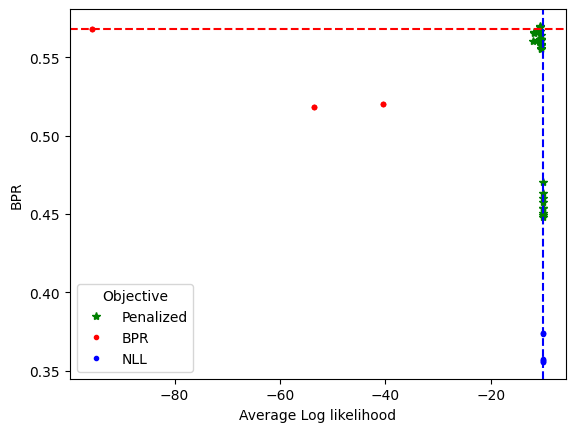

In [52]:
plt.plot(-np.array(nlls), -np.array(bprs), 'g*', label='Penalized')
plt.plot(-np.array(nlls_b), -np.array(bprs_b), 'r.', label='BPR')
plt.plot(-np.array(nlls_n), -np.array(bprs_n), 'b.', label='NLL')
#plot vertical line at max nll
plt.axvline(-np.min(nlls_n), color='b', linestyle='--')   
plt.axhline(-np.min(bprs_b), color='r', linestyle='--')   
plt.legend(title='Objective')
plt.xlabel('Average Log likelihood')
plt.ylabel('BPR')

In [48]:
np.min(nlls_n)

9.983924

In [49]:
np.min(nlls)

10.087421

'/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.05'

In [19]:


model_base = '/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3'
all_runs = glob(f'{model_base}/*/')

# Make pdf of all pngs in directory
for run in all_runs:
    pngs = glob(os.path.join(run, "*.png"))
    outfile=os.path.join(run, 'report.pdf')
    images = [Image.open(png) for png in pngs]
    images[0].save(outfile, save_all=True, append_images=images[1:])

In [14]:
from PIL import Image